In [1]:
from CovMat import *
import gc
from cl_and_cov import *
from signal_to_noise import *
from fisher_FoM import *

In [2]:
import numpy as np
Omega_m=0.315
Omega_b=0.045
h=0.67
sigma8=0.8
n_s=0.96
w_0 = -1
w_a = 0
transfer_function = 'bbks'
fsky = 0.4
ell = np.arange(2, 3001)

In [3]:
# Input Cosmology object with a given set of parameters
cosmo = ccl.Cosmology(
    Omega_c = Omega_m-Omega_b, Omega_b=Omega_b, h=h, sigma8=sigma8, n_s=n_s,
    transfer_function=transfer_function)

In [4]:
arcmin_per_str=(180*60/np.pi)**2
#how many square arcminutes are there in a steradian 
numdenPerStr = arcmin_per_str*10.024

In [60]:
#binning in l
binl=10**np.linspace(np.log10(10), np.log10(2800), 20)

In [61]:
binl

array([  10.        ,   13.45233863,   18.09654146,   24.34408038,
         32.7484813 ,   44.05436601,   59.26342497,   79.72316611,
        107.24630273,  144.27135812,  194.07871642,  261.08126143,
        351.2153539 ,  472.46678731,  635.57832148,  855.00148071,
       1150.17694485, 1547.25697477, 2081.42247739, 2800.        ])

In [6]:
#try a symmetric distribution
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
dndz_s = np.zeros([600,2])
dndz_s[:, 0] = np.linspace(0.001, 4.001, 600)

In [7]:
dndz_s[100, 0]

0.668779632721202

In [8]:
dndz_s[0:200, 1] = gaussian(dndz_s[0:200, 0], (dndz_s[100, 0]+dndz_s[101, 0])/2, 0.5)
dndz_s[200:400, 1] = gaussian(dndz_s[200:400, 0], (dndz_s[301, 0]+dndz_s[300, 0])/2, 0.5)
dndz_s[400:600, 1] = gaussian(dndz_s[400:600, 0], (dndz_s[501, 0]+dndz_s[500, 0])/2, 0.5)

In [9]:
cl_s = {} 
cov_s = {}
redshifts_s = {}
sliced_dndz_s = {}

for n in range(1,7):
    for btype in ["z", "n"]:
        cov_s["{0}_{1}".format(btype, n)], cl_s["{0}_{1}".format(btype, n)], redshifts_s["{0}_{1}".format(btype, n)], sliced_dndz_s["{0}_{1}".format(btype, n)] = getDataArray(n_bins=n, bin_type=btype, cosmo=cosmo, dndz=dndz_s, ell=ell, numdenPerStr = numdenPerStr, fsky=0.4)

In [10]:
for i in ["z", "n"]:
    for j in range(1,7):
        print(num_den(sliced_dndz_s["{0}_{1}".format(i,j)], numdenPerStr))

[1.18464663e+08]
[59080608.04864304 59384055.02042077]
[39488221.02302127 39488221.02302127 39488221.02302127]
[31604328.37935706 27476279.66928597 27579049.6023658  31805005.41805496]
[24682981.67283034 20545170.81933648 27846129.38036034 20421973.50410908
 24968407.69242757]
[19592387.02562177 19895833.9973995  19592387.02562177 19895833.9973995
 19592387.02562177 19895833.9973995 ]
[1.18464663e+08]
[59080608.04864304 59384055.02042077]
[39488221.02302127 39488221.02302127 39488221.02302127]
[29441871.26550408 29638736.78313896 29707119.18306949 29676935.83735127]
[23680759.67573693 23695493.46185772 23507830.81544695 23858936.41763055
 23721642.69839163]
[19592387.02562177 19895833.9973995  19592387.02562177 19895833.9973995
 19592387.02562177 19895833.9973995 ]


In [13]:
for i in ["z", "n"]:
    for j in range(1,7):
        print(np.sum(num_den(sliced_dndz_s["{0}_{1}".format(i,j)], numdenPerStr)))

118464663.0690638
118464663.06906381
118464663.0690638
118464663.0690638
118464663.06906381
118464663.0690638
118464663.0690638
118464663.06906381
118464663.0690638
118464663.0690638
118464663.06906378
118464663.0690638


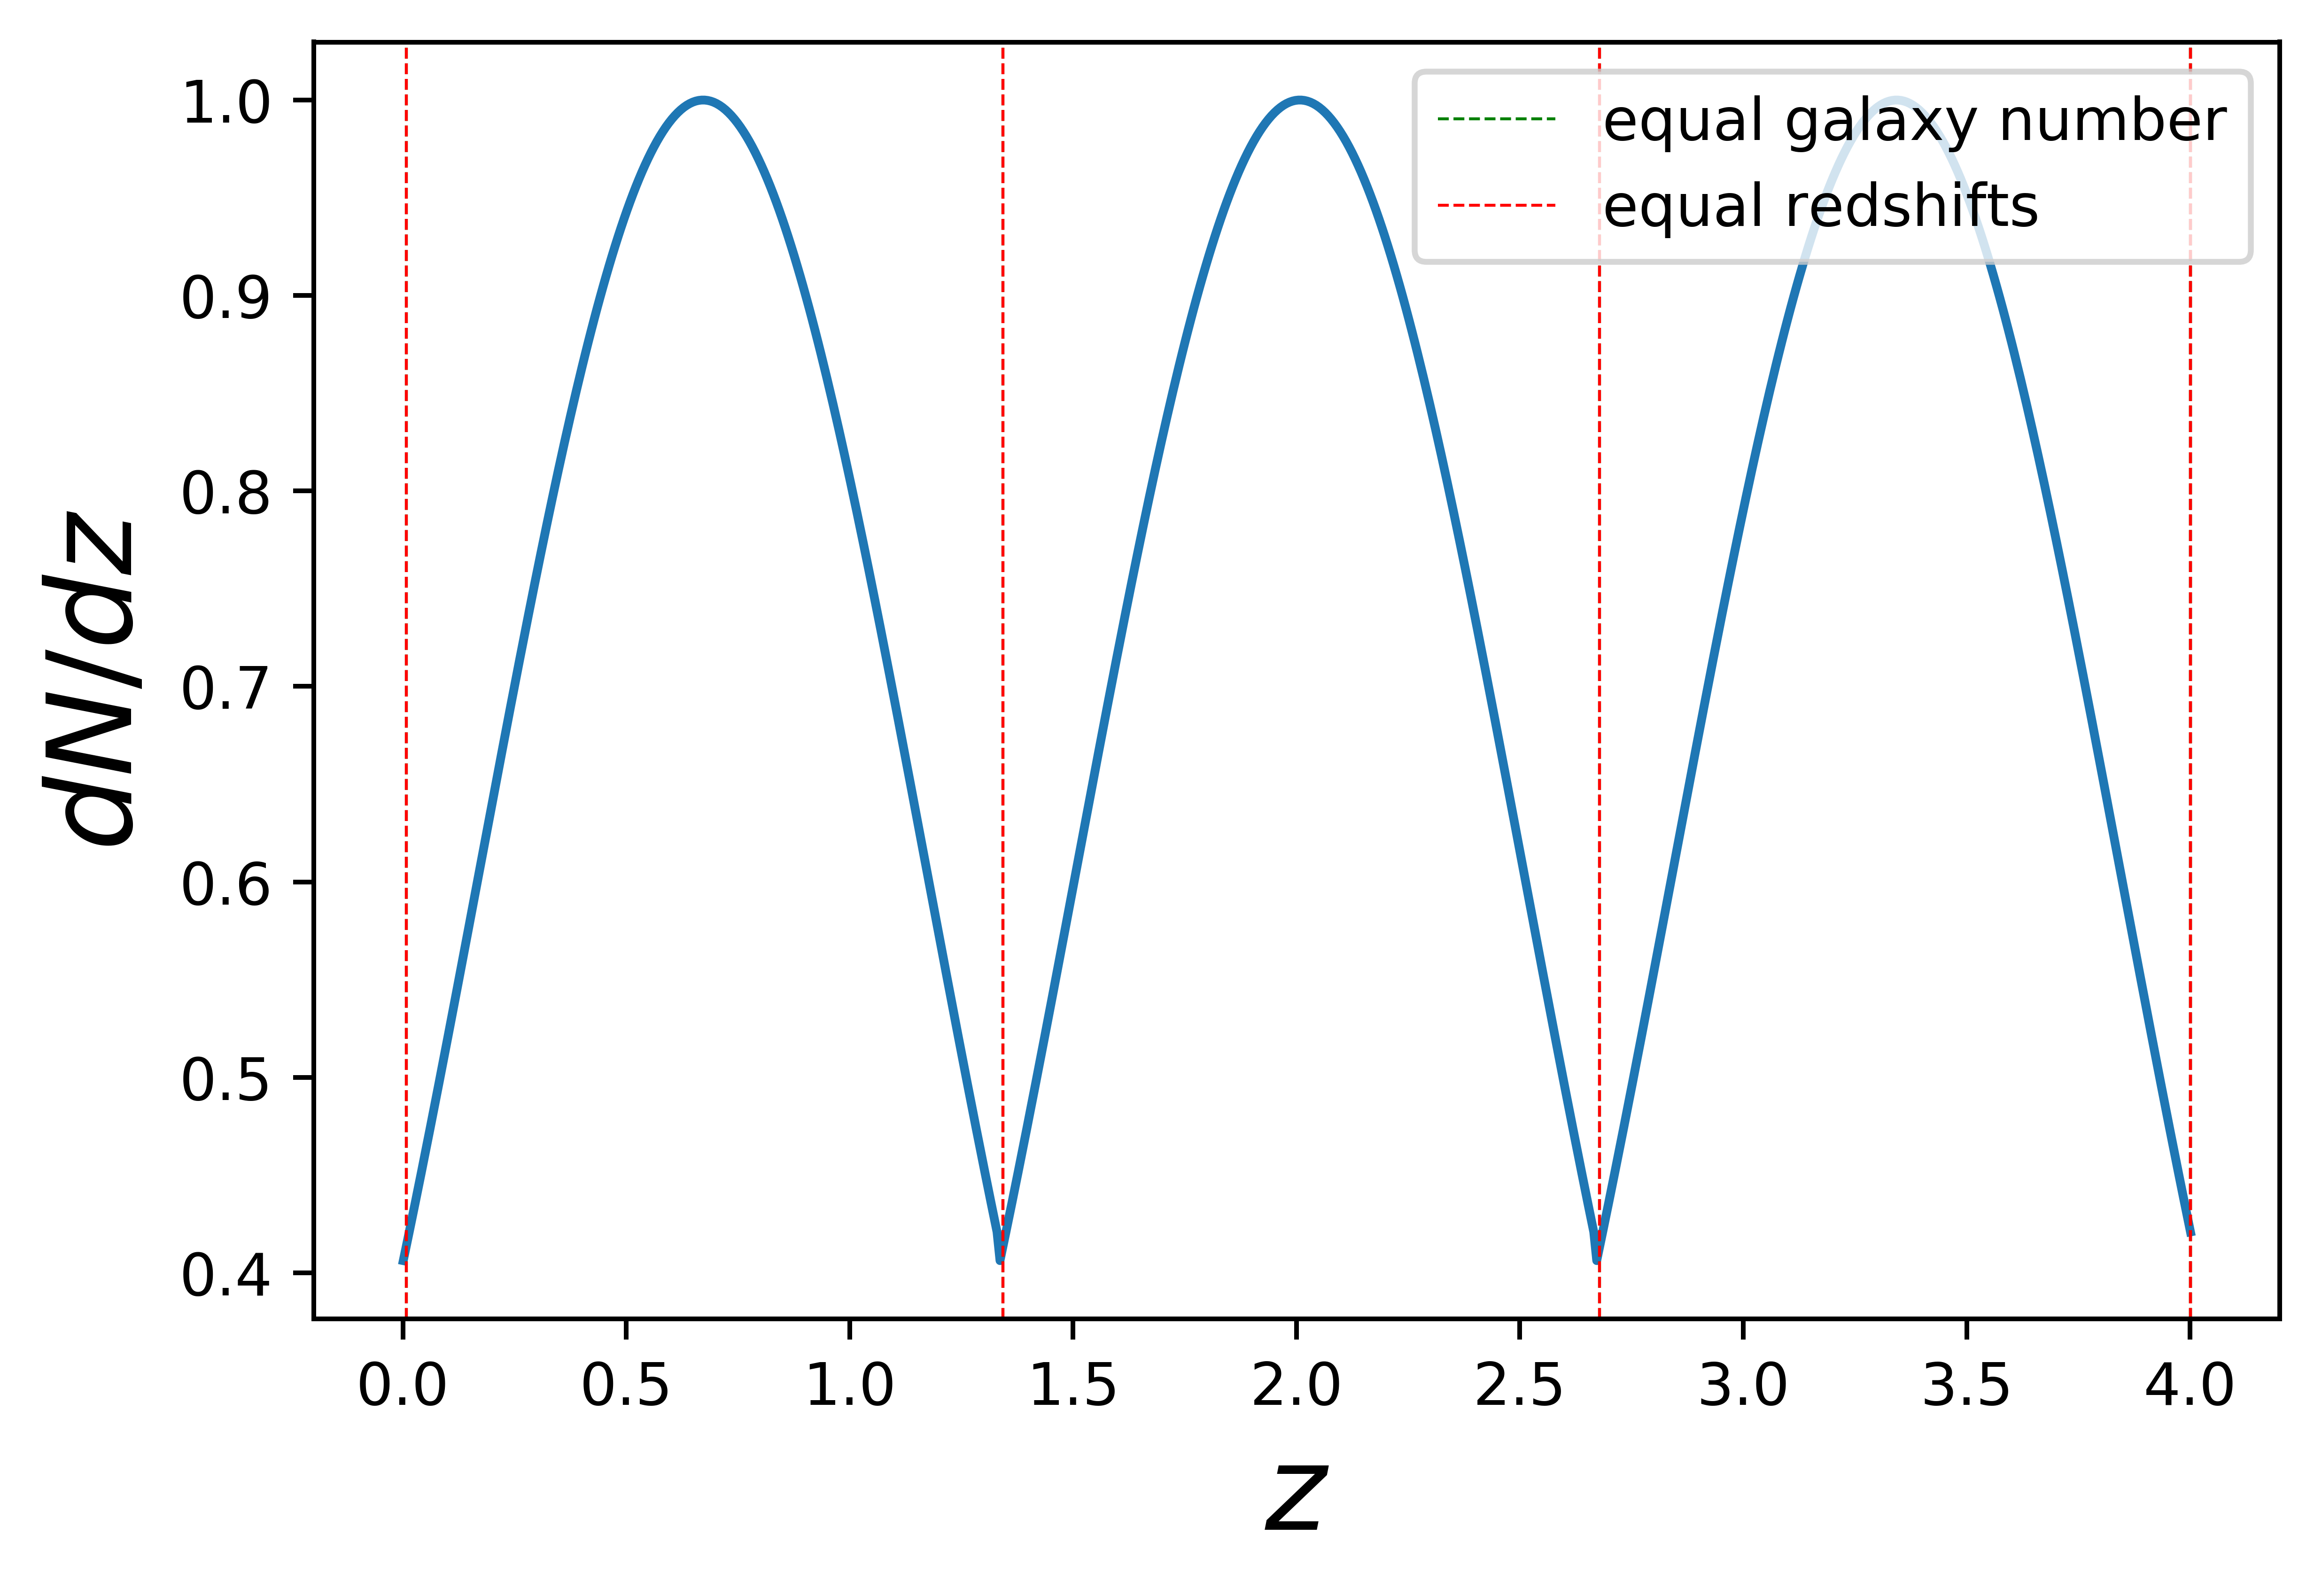

In [14]:
plt.plot(dndz_s[:,0], dndz_s[:,1])
plt.xlabel(r'$z$',fontsize=20)
plt.ylabel(r'$dN/dz$',fontsize=20)
for x in redshifts_s["n_3"]:
    plt.axvline(x, linewidth=0.5, color="g", linestyle="--")
plt.axvline(x, linewidth=0.5, color="g", linestyle="--", label="equal galaxy number")

for x in redshifts_s["z_3"]:
    plt.axvline(x, linewidth=0.5, color="r", linestyle="--")
plt.axvline(x, linewidth=0.5, color="r", linestyle="--", label="equal redshifts")

plt.legend(loc='upper right')
plt.show()

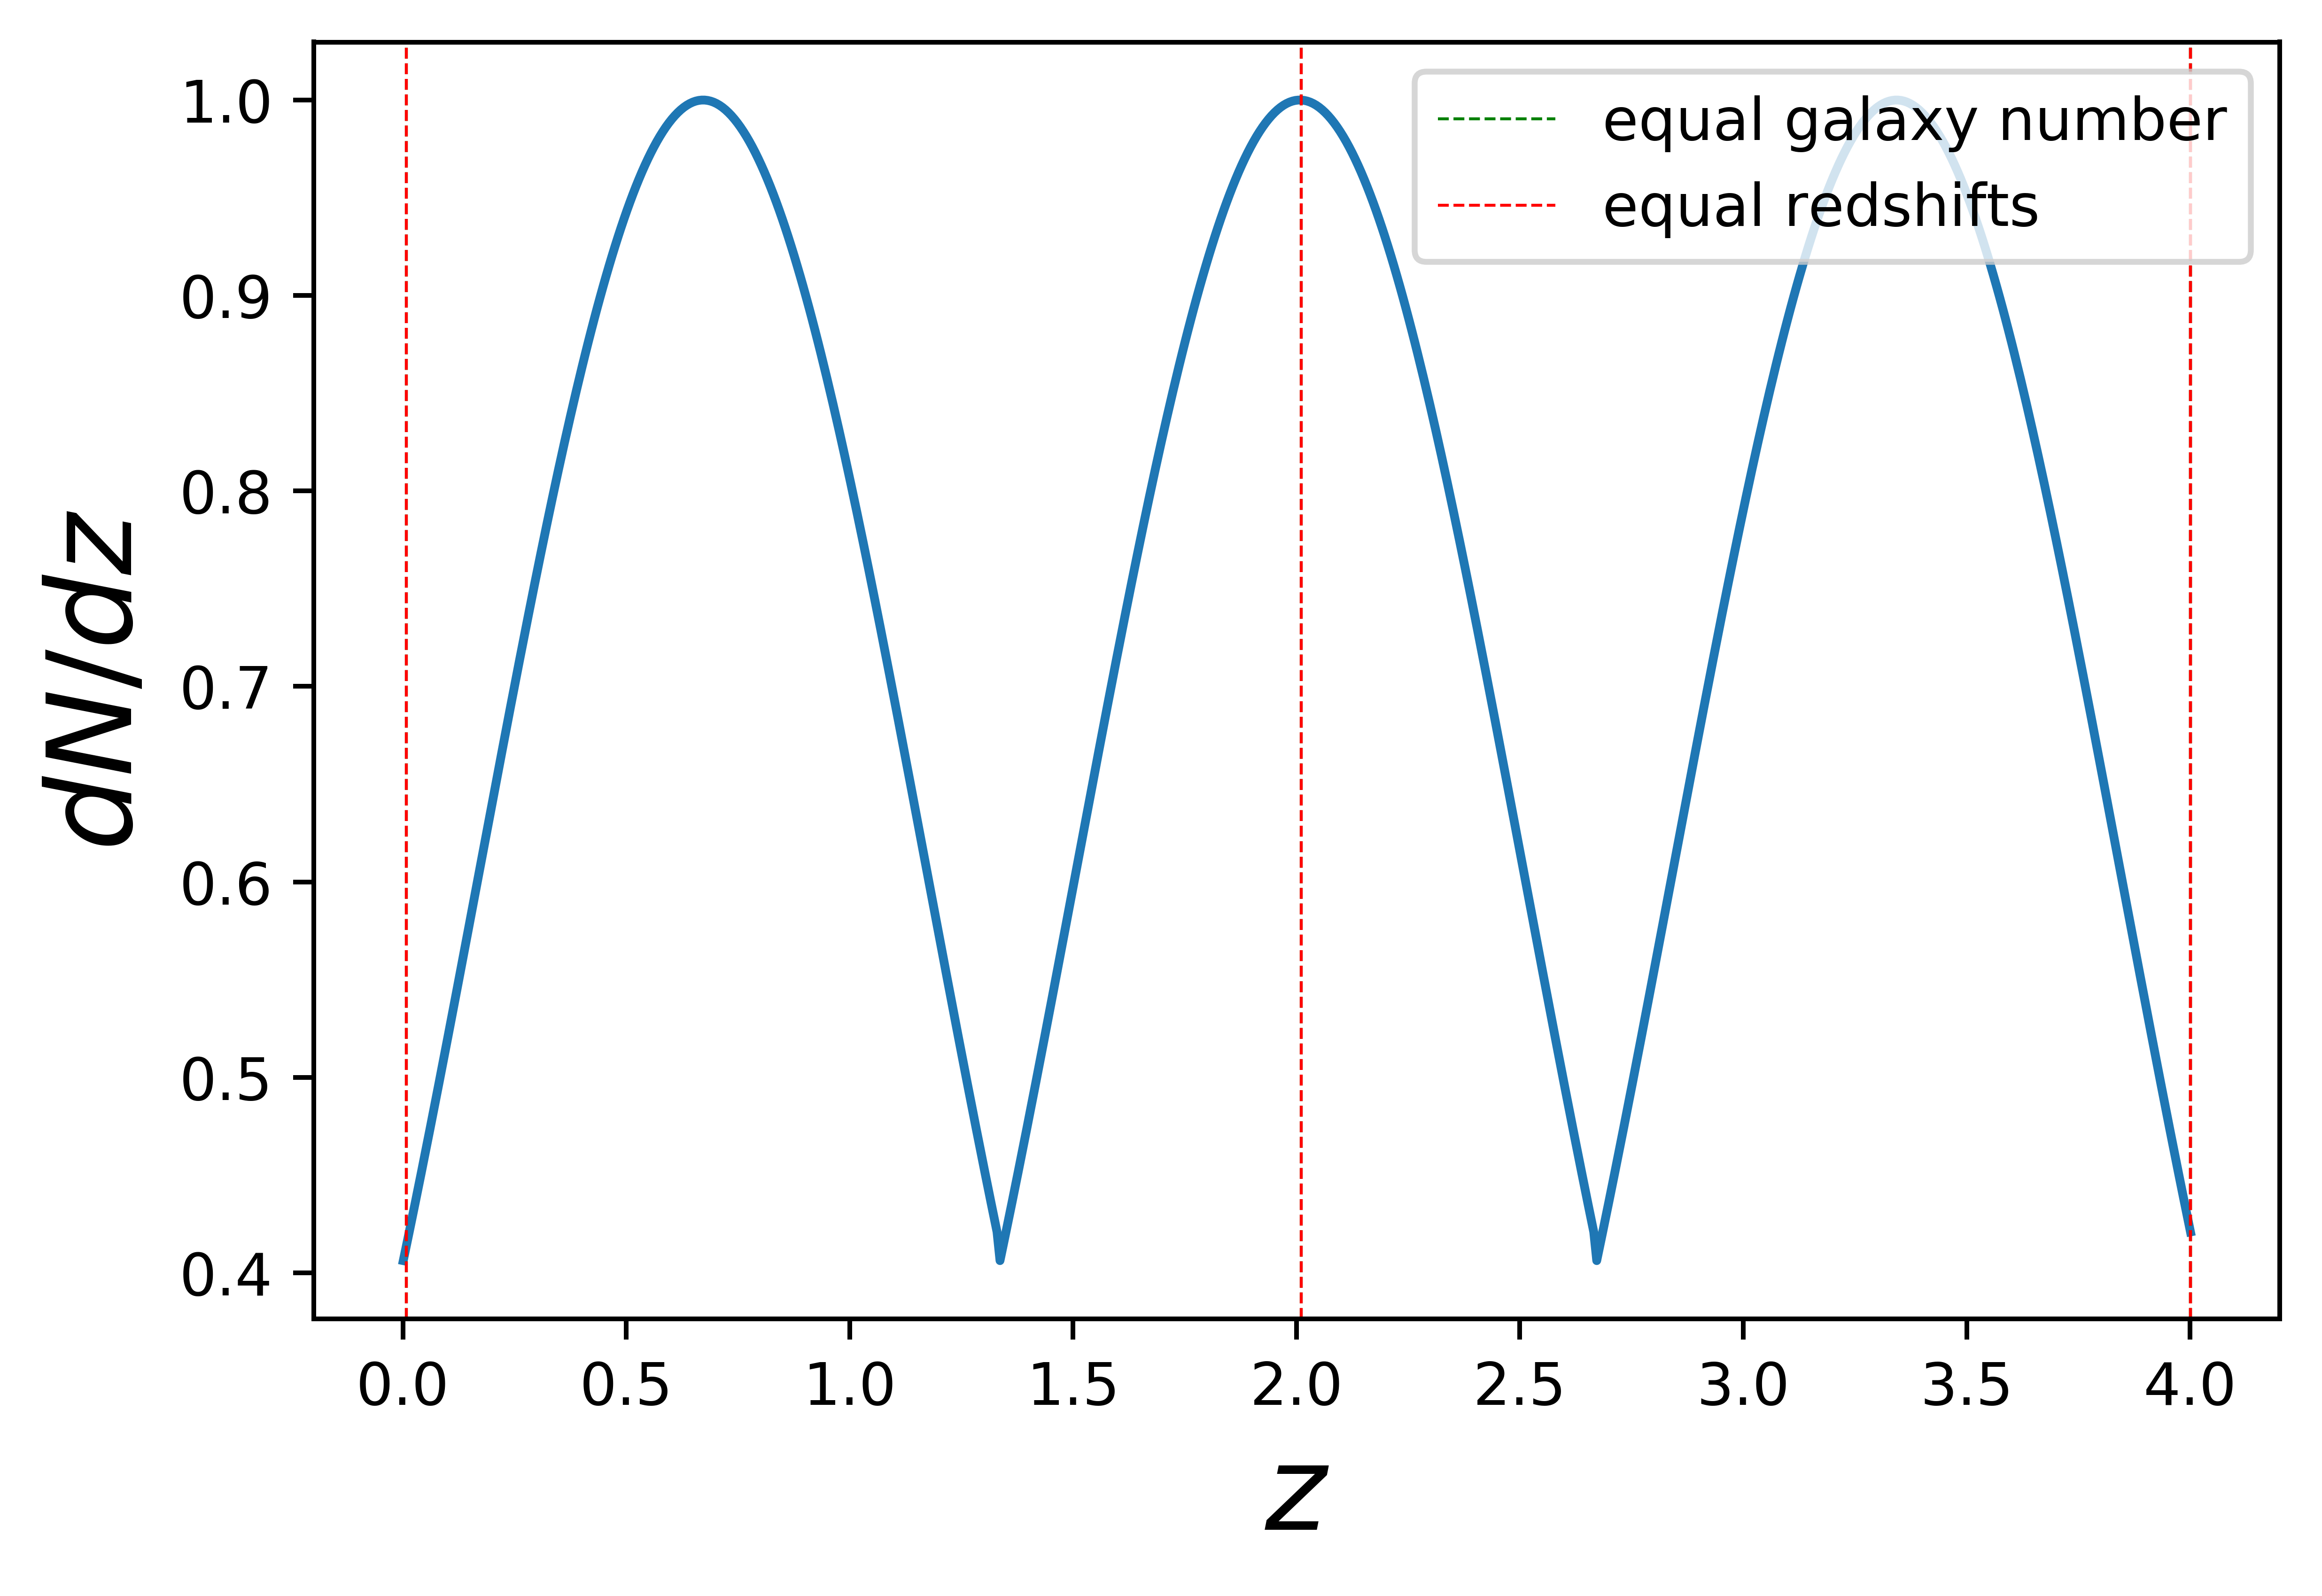

In [15]:
plt.plot(dndz_s[:,0], dndz_s[:,1])
plt.xlabel(r'$z$',fontsize=20)
plt.ylabel(r'$dN/dz$',fontsize=20)
for x in redshifts_s["n_2"]:
    plt.axvline(x, linewidth=0.5, color="g", linestyle="--")
plt.axvline(x, linewidth=0.5, color="g", linestyle="--", label="equal galaxy number")

for x in redshifts_s["z_2"]:
    plt.axvline(x, linewidth=0.5, color="r", linestyle="--")
plt.axvline(x, linewidth=0.5, color="r", linestyle="--", label="equal redshifts")

plt.legend(loc='upper right')
plt.show()

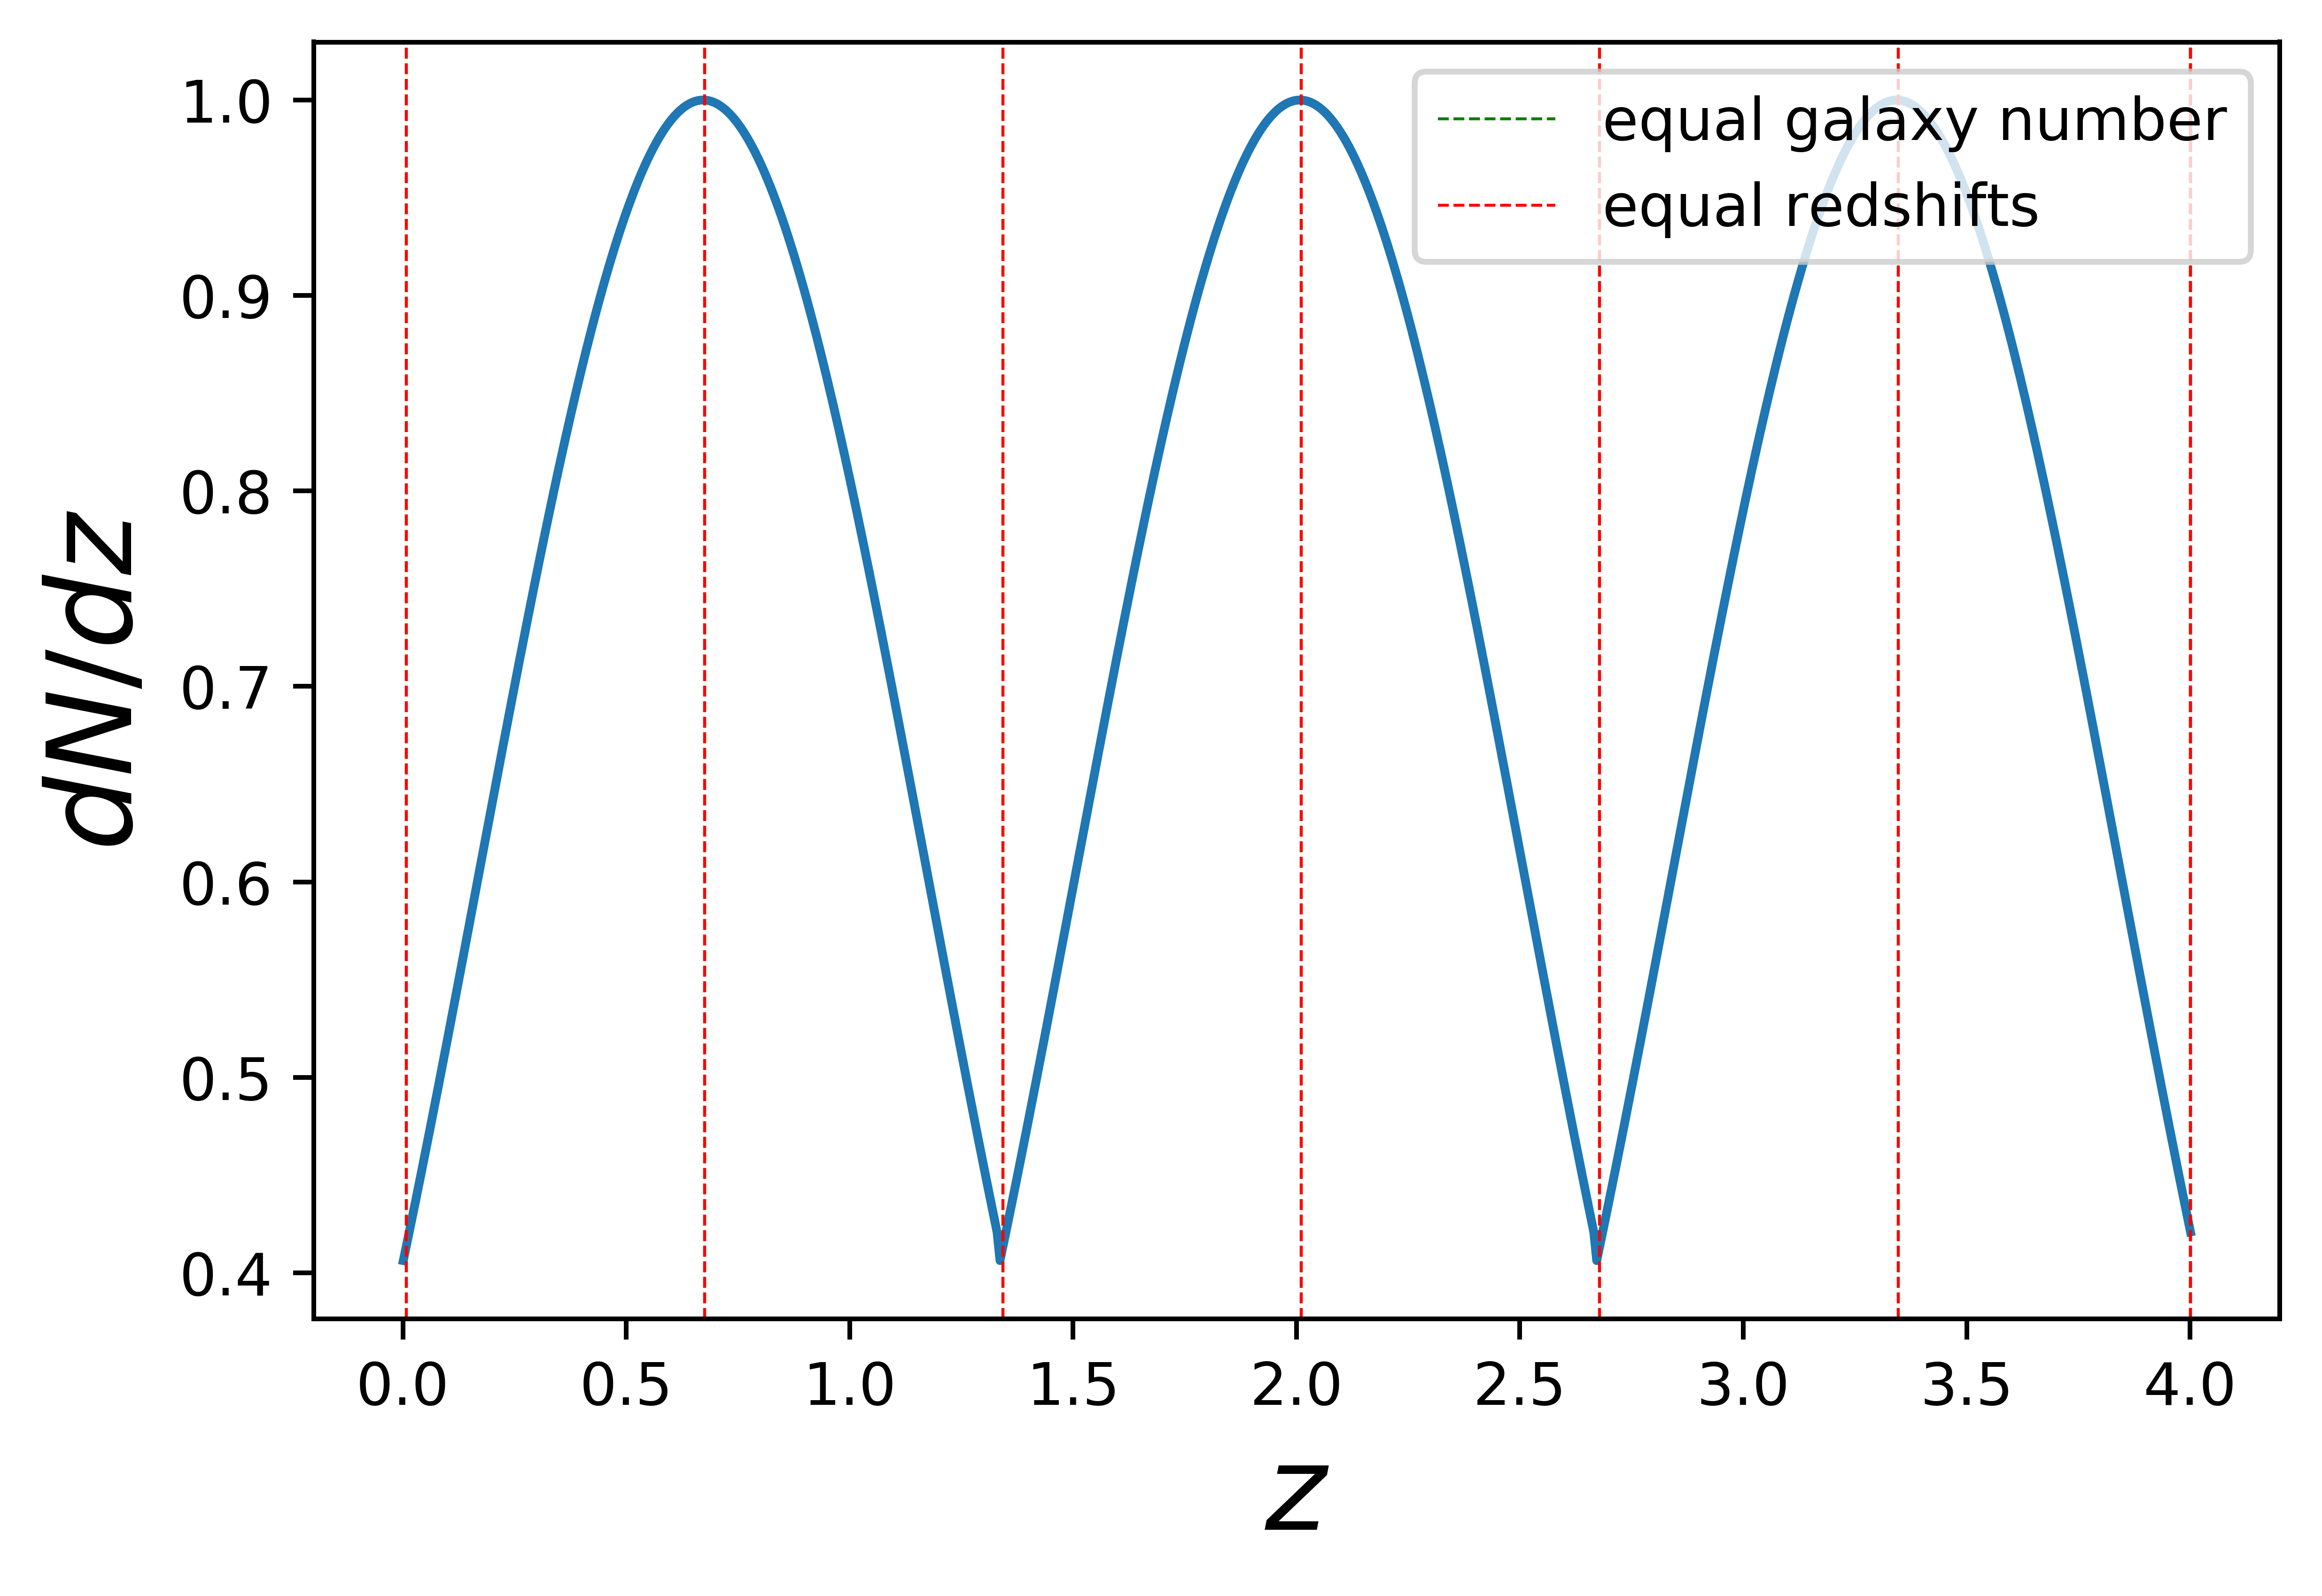

In [16]:
plt.plot(dndz_s[:,0], dndz_s[:,1])
plt.xlabel(r'$z$',fontsize=20)
plt.ylabel(r'$dN/dz$',fontsize=20)
for x in redshifts_s["n_6"]:
    plt.axvline(x, linewidth=0.5, color="g", linestyle="--")
plt.axvline(x, linewidth=0.5, color="g", linestyle="--", label="equal galaxy number")

for x in redshifts_s["z_6"]:
    plt.axvline(x, linewidth=0.5, color="r", linestyle="--")
plt.axvline(x, linewidth=0.5, color="r", linestyle="--", label="equal redshifts")

plt.legend(loc='upper right')
plt.show()

In [62]:
stn_s = {}
for i in ["z", "n"]:
    for j in range(1,7):
        stn_s["{0}_{1}".format(i,j)] = SignalToNoise(bins_in_z=j, binl=binl, cl = cl_s["{0}_{1}".format(i, j)], cov = cov_s["{0}_{1}".format(i, j)], ell=ell)

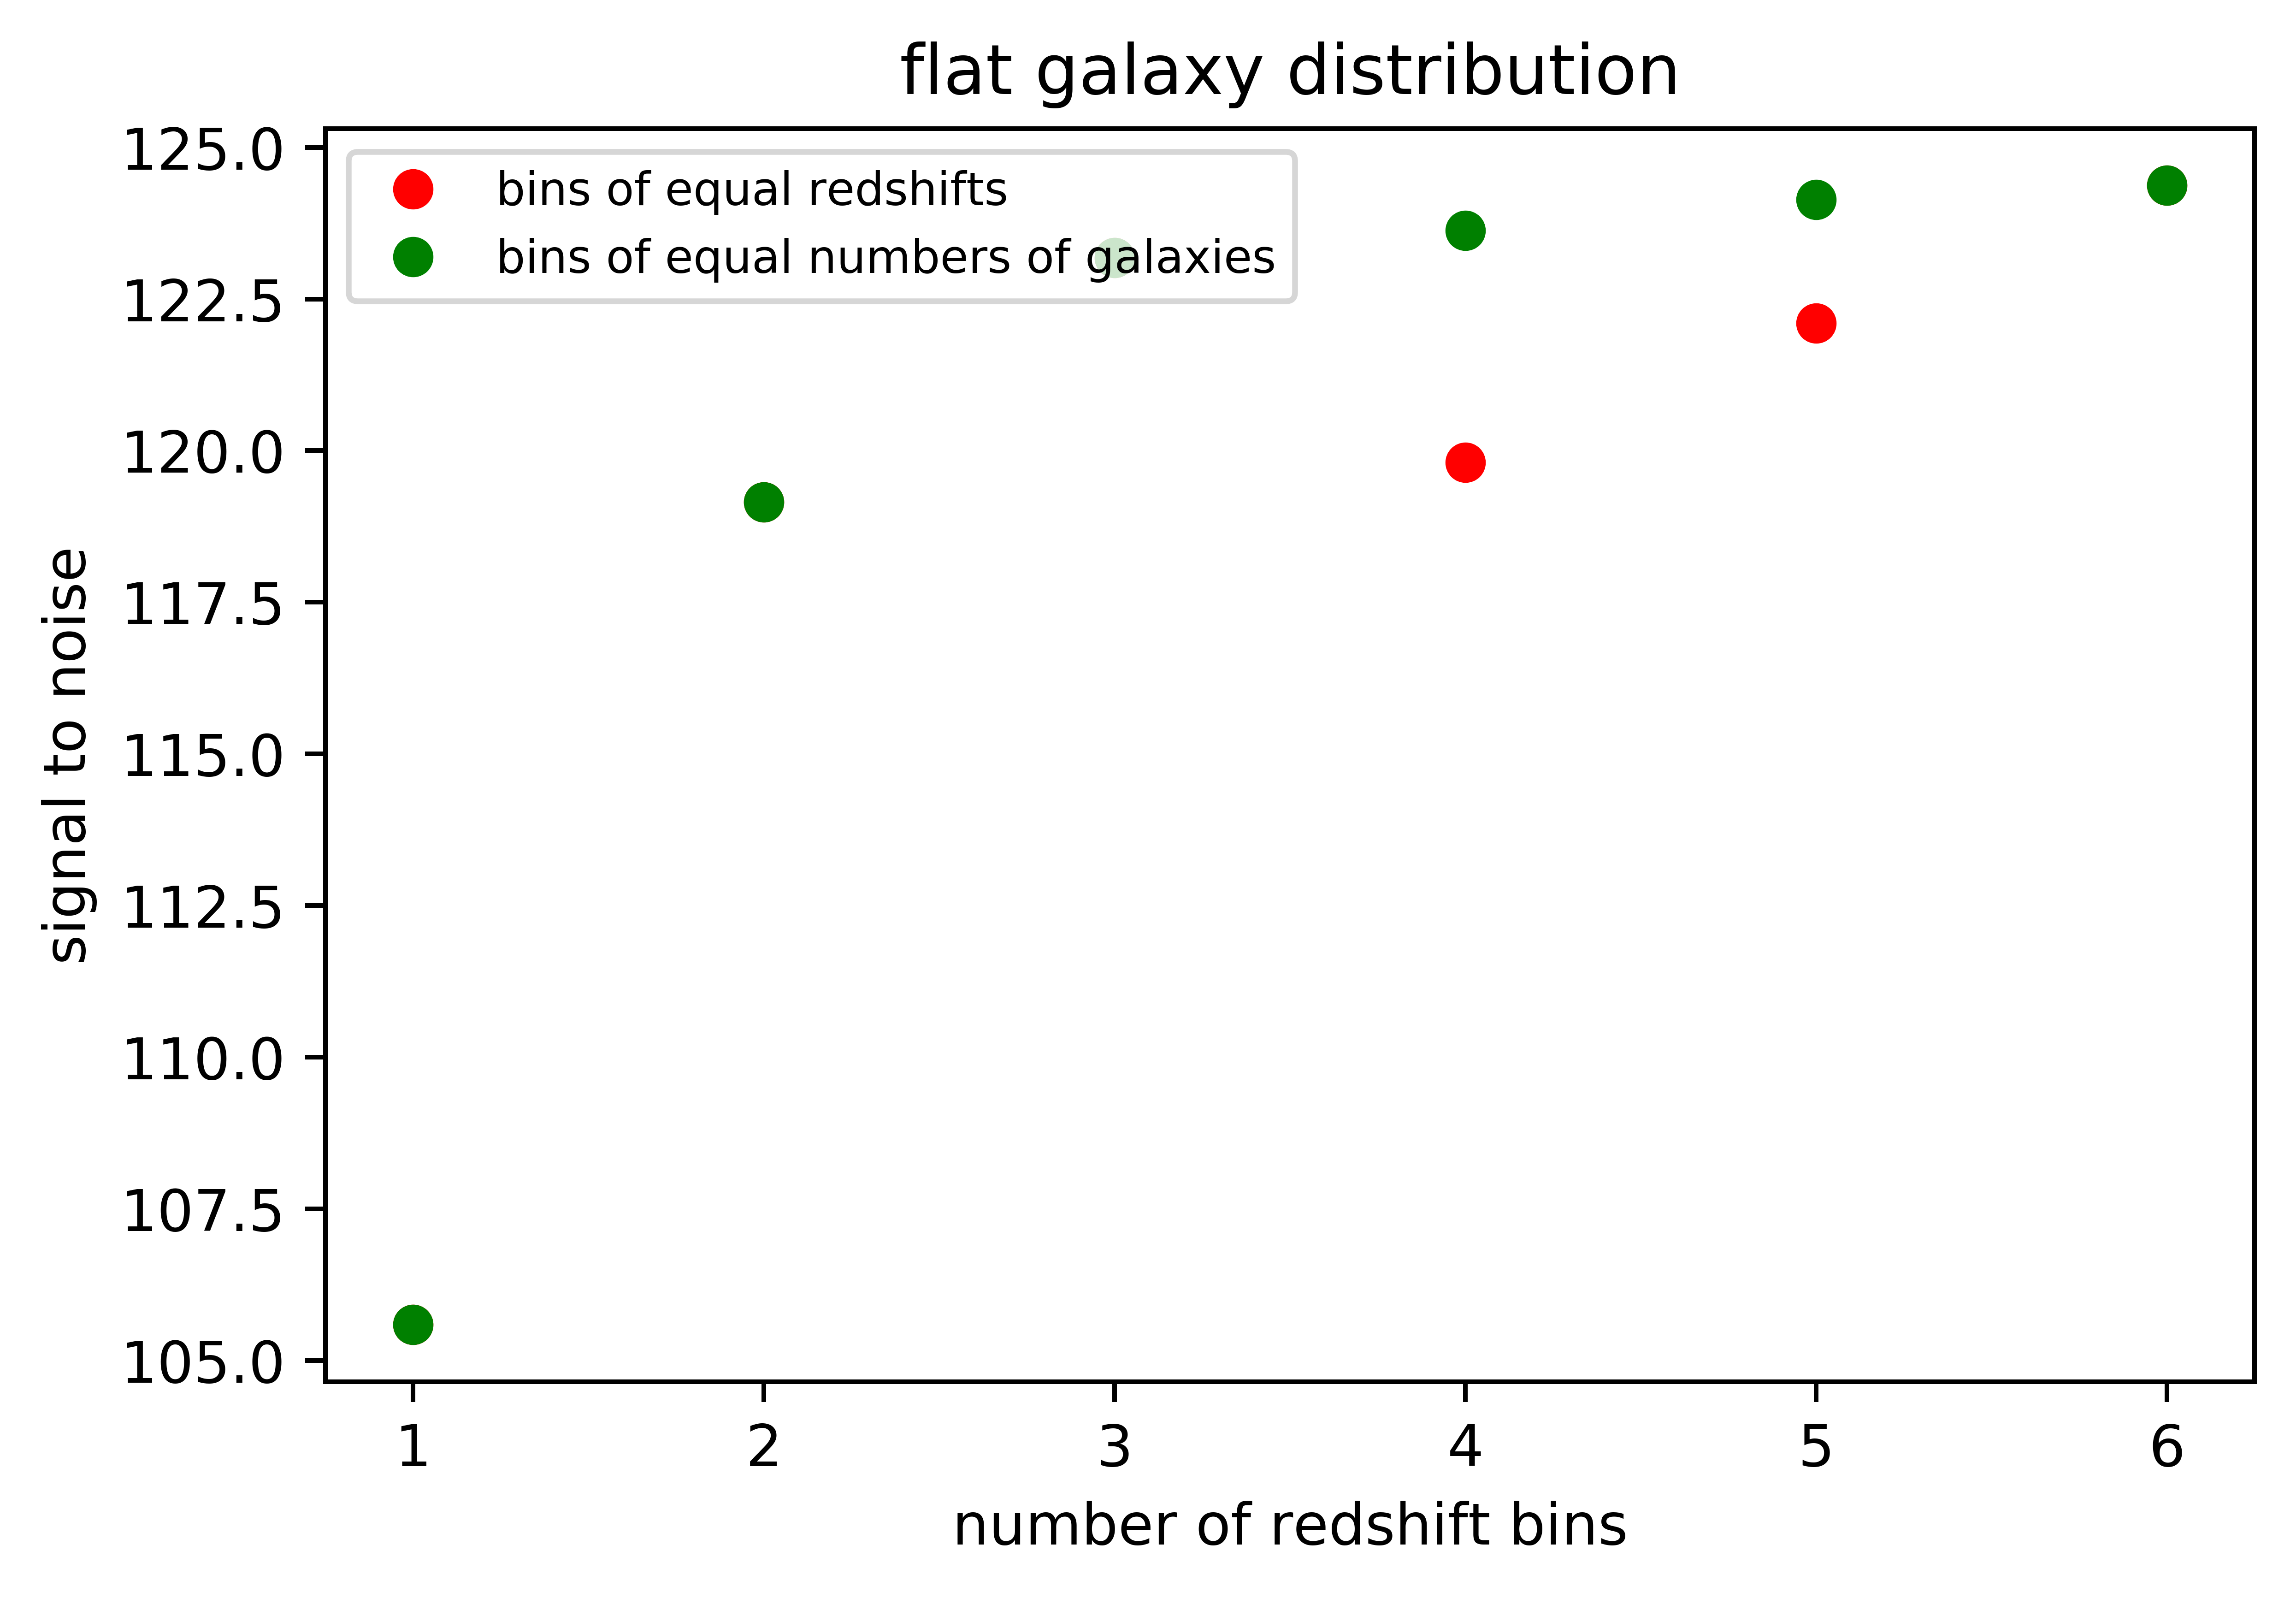

In [63]:
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.figure()
plt.plot([1, 2, 3, 4, 5, 6], [stn_s["z_1"], stn_s["z_2"], stn_s["z_3"], stn_s["z_4"], stn_s["z_5"], stn_s["z_6"]],
         color='r', linestyle='None', marker ="o", markersize = 6.0, label = "bins of equal redshifts")
plt.plot([1, 2, 3, 4, 5, 6], [stn_s["n_1"], stn_s["n_2"], stn_s["n_3"], stn_s["n_4"], stn_s["n_5"], stn_s["n_6"]],
         color='g', linestyle='None', marker ="o", markersize = 6.0, label = "bins of equal numbers of galaxies")
plt.xlabel("number of redshift bins")
plt.ylabel("signal to noise")
plt.legend(loc="upper left", fontsize=8)
plt.title('flat galaxy distribution')
plt.show() 

the tomographic bin division looks reasonable

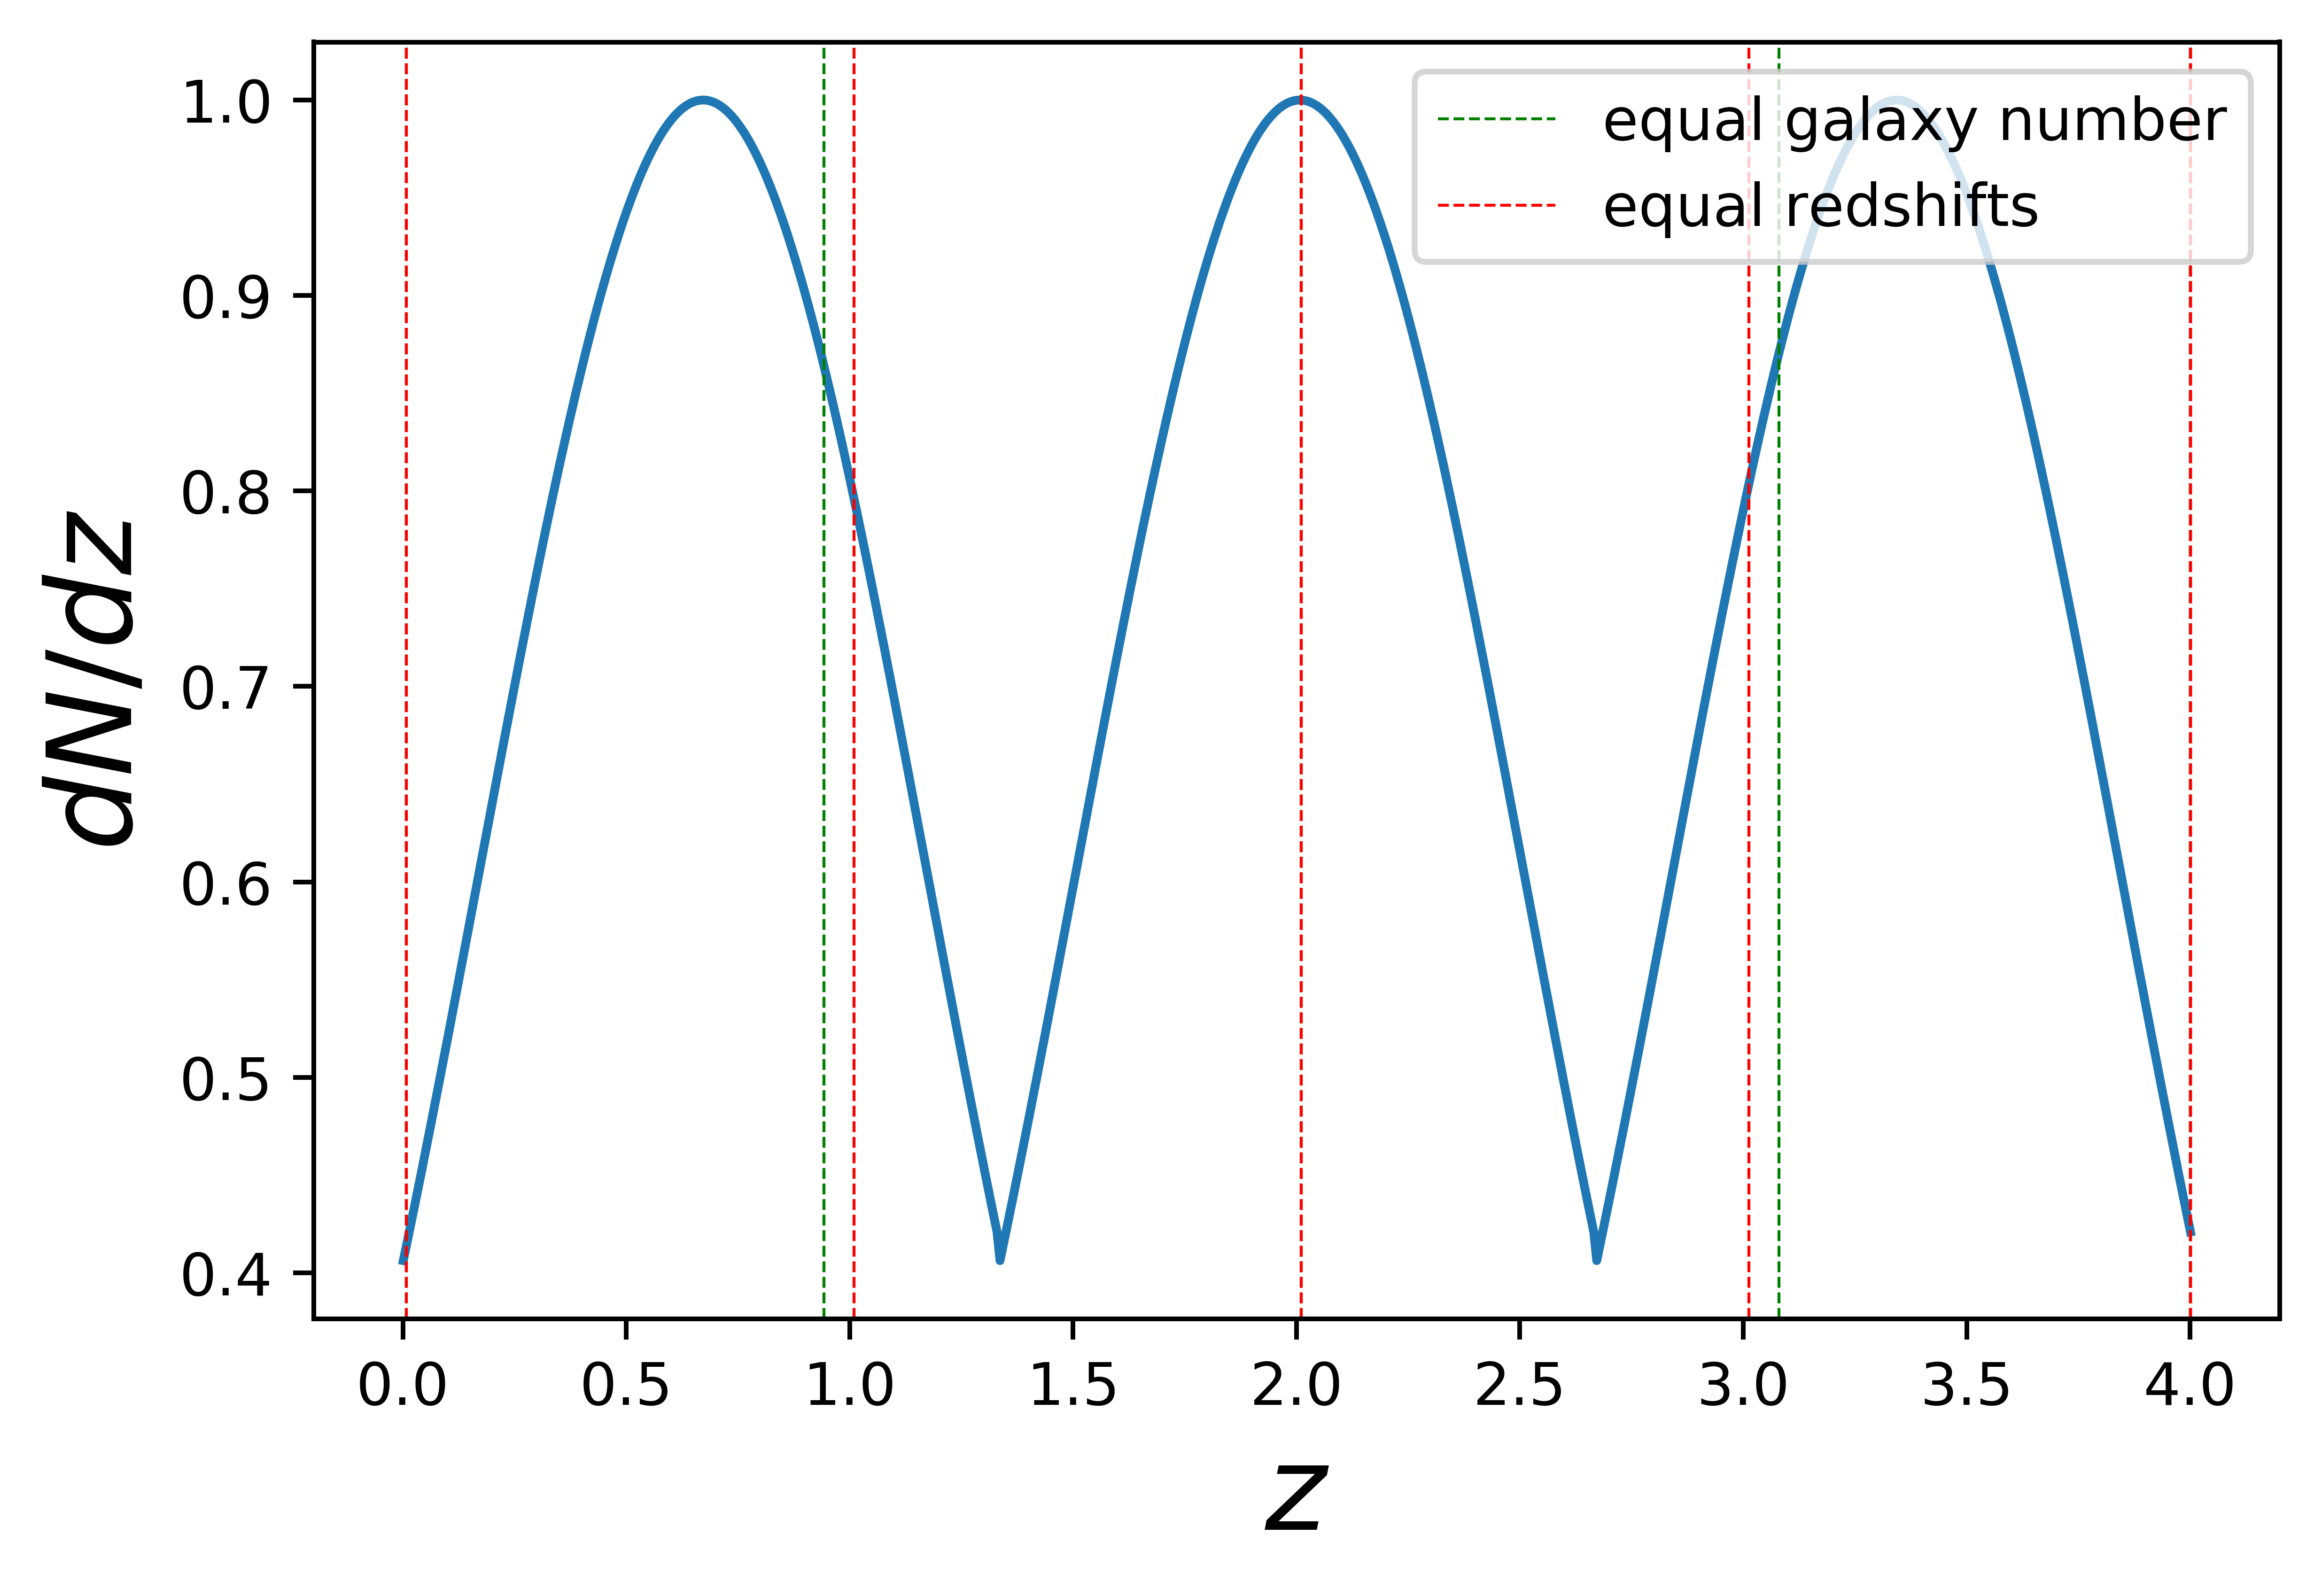

In [19]:
plt.plot(dndz_s[:,0], dndz_s[:,1])
plt.xlabel(r'$z$',fontsize=20)
plt.ylabel(r'$dN/dz$',fontsize=20)
for x in redshifts_s["n_4"]:
    plt.axvline(x, linewidth=0.5, color="g", linestyle="--")
plt.axvline(x, linewidth=0.5, color="g", linestyle="--", label="equal galaxy number")

for x in redshifts_s["z_4"]:
    plt.axvline(x, linewidth=0.5, color="r", linestyle="--")
plt.axvline(x, linewidth=0.5, color="r", linestyle="--", label="equal redshifts")

plt.legend(loc='upper right')
plt.show()


for 4 redshift bins, we would expect bin 1 of equal redshift having higher signal than bin 1 of equal galaxy number. We would also expect bin 4 of equal galaxy number having higher signal than bin 4 of equal redshift. let's check that.

In [64]:
binned_cl_s = {}
binned_cov_s = {}
binned_cl_s["z_4"] = binnedCl(4, binl, cl_s["z_4"], ell)
binned_cl_s["n_4"] = binnedCl(4, binl, cl_s["n_4"], ell)
binned_cov_s["z_4"] = binnedCov(4, binl, cov_s["z_4"], ell)
binned_cov_s["n_4"] = binnedCov(4, binl, cov_s["n_4"], ell)


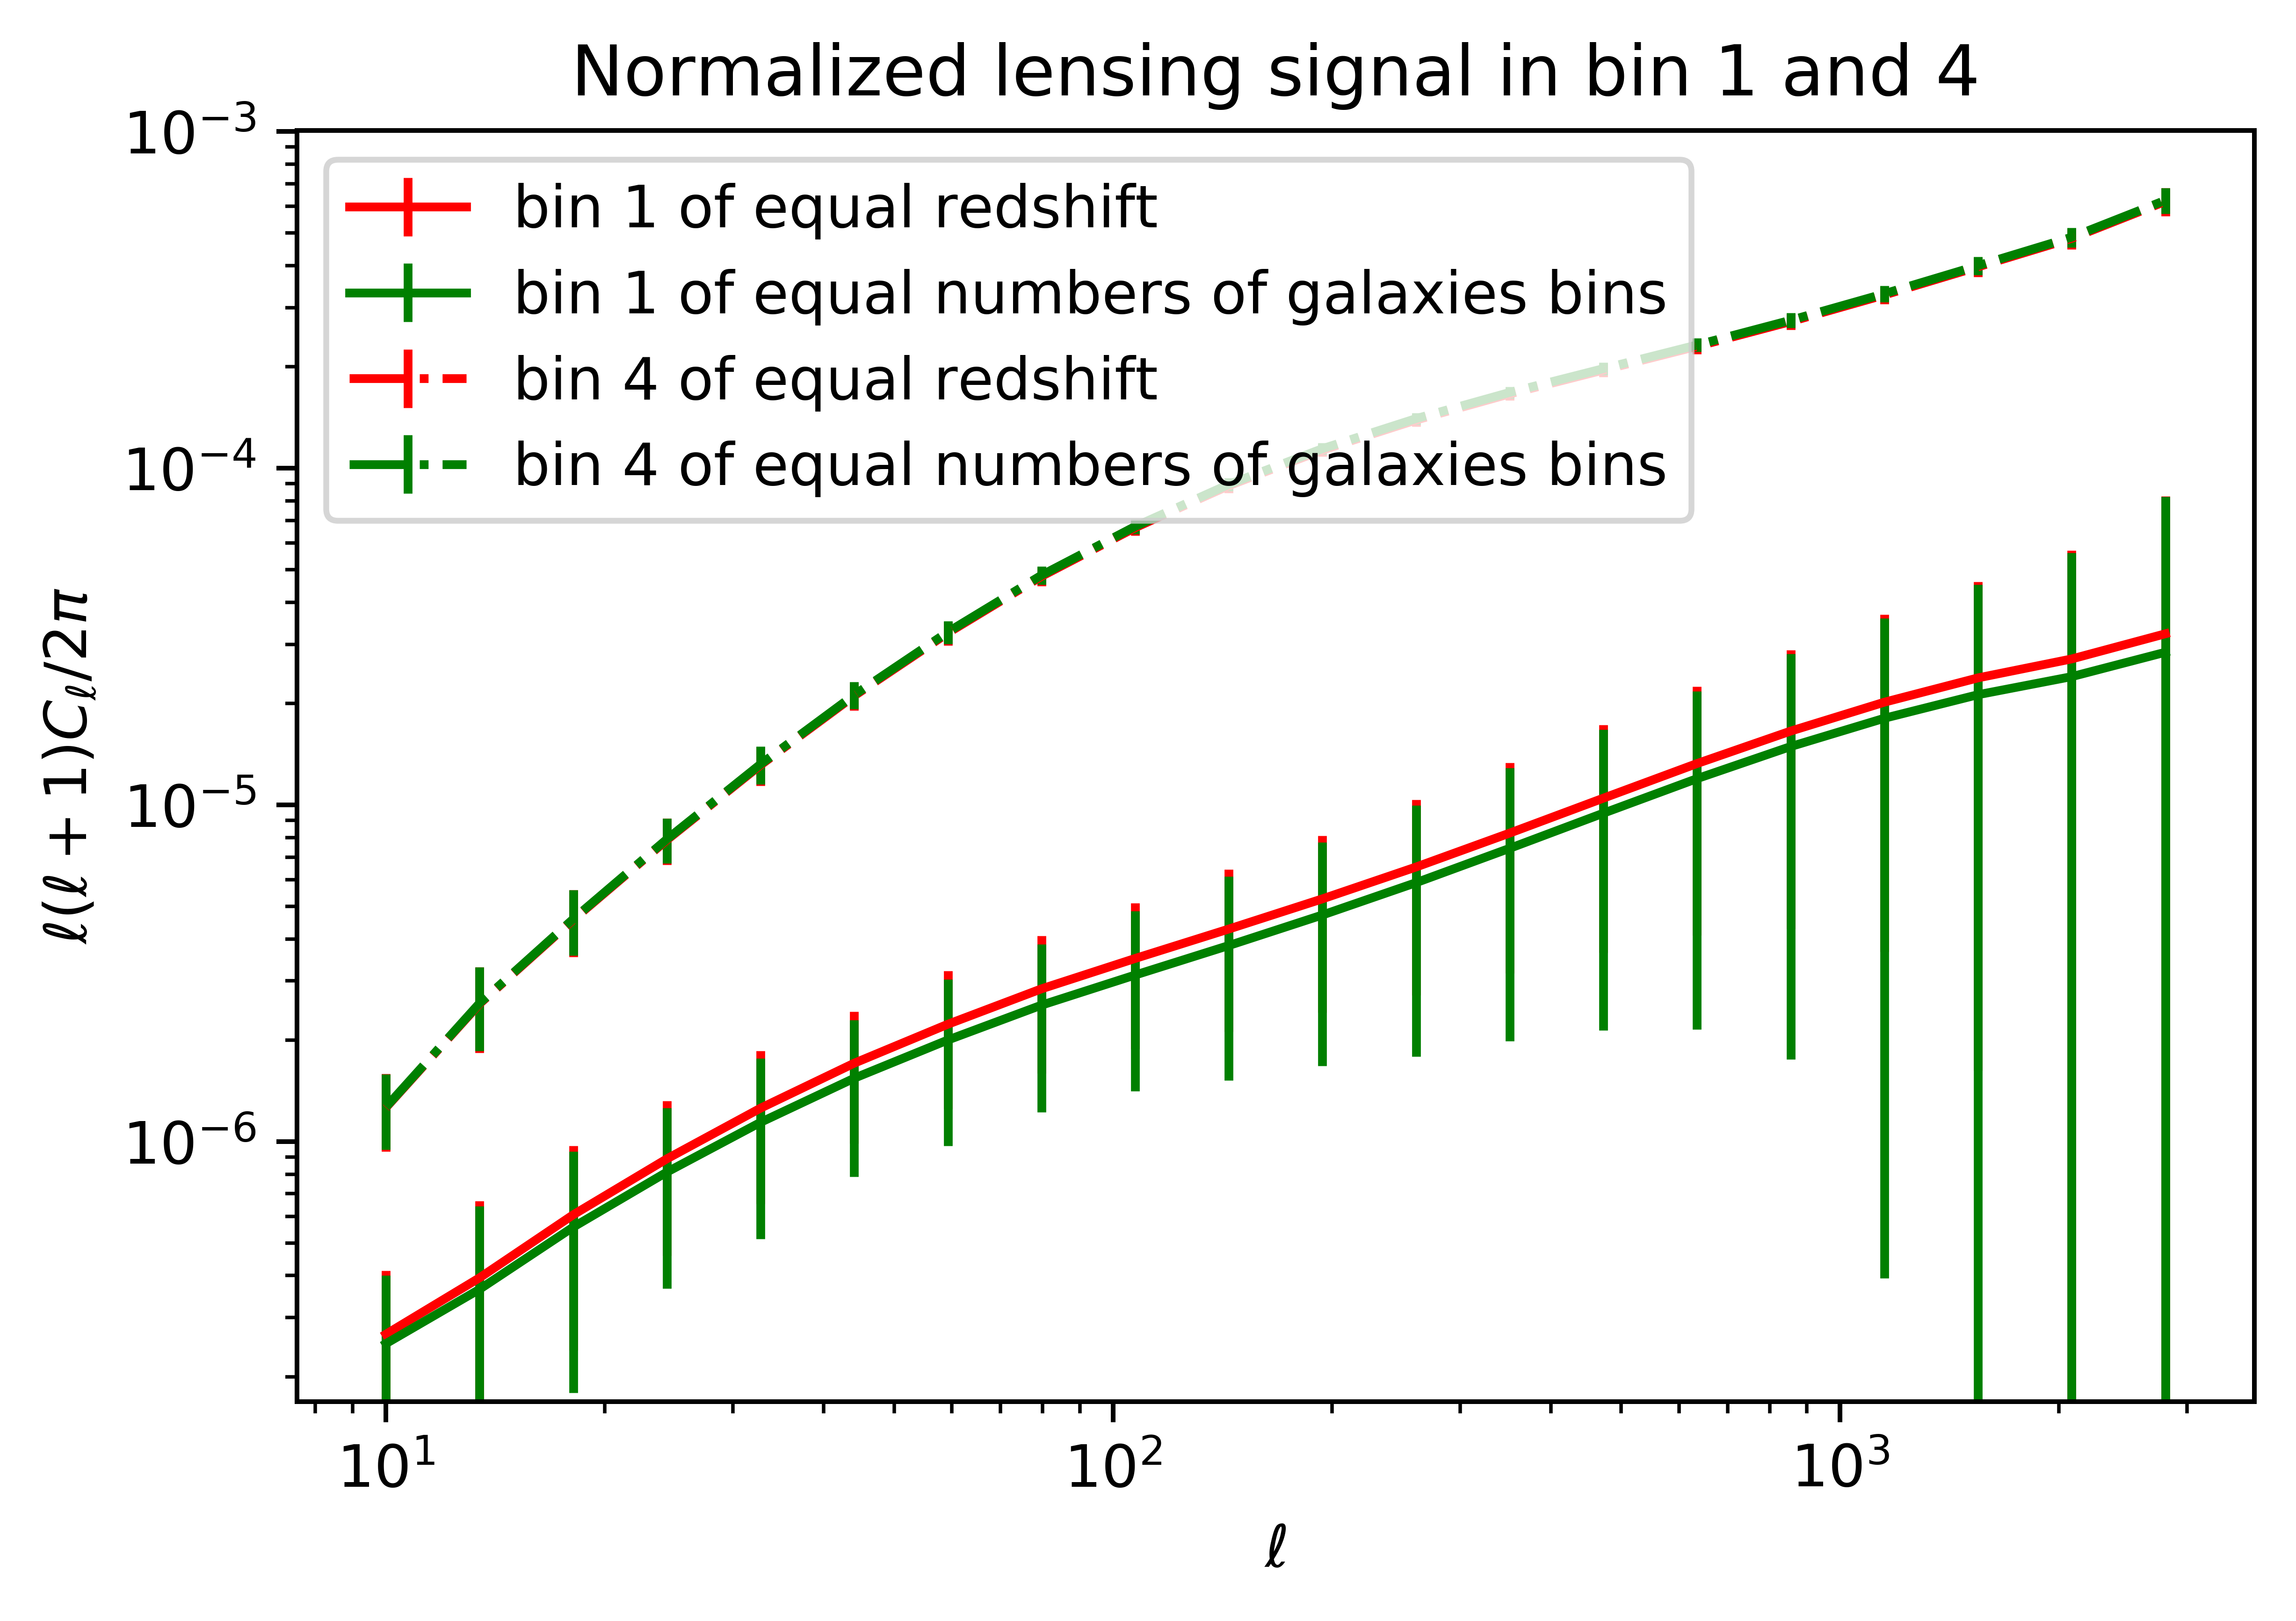

In [71]:
plt.figure()

plt.errorbar(binl, normalizing(binned_cl_s["z_4"][0], binl), yerr = normalizing(np.sqrt(binned_cov_s["z_4"][:, 0, 0]), binl), color='r', label = "bin 1 of equal redshift")
plt.errorbar(binl, normalizing(binned_cl_s["n_4"][0], binl), yerr = normalizing(np.sqrt(binned_cov_s["n_4"][:, 0, 0]), binl), color='g', label = "bin 1 of equal numbers of galaxies bins")

plt.errorbar(binl, normalizing(binned_cl_s["z_4"][9], binl), yerr = normalizing(np.sqrt(binned_cov_s["z_4"][:, 9, 9]), binl), color='r', ls='-.', label = "bin 4 of equal redshift")
plt.errorbar(binl, normalizing(binned_cl_s["n_4"][9], binl), yerr = normalizing(np.sqrt(binned_cov_s["n_4"][:, 9, 9]), binl), color='g', ls='-.', label = "bin 4 of equal numbers of galaxies bins")


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_{\ell}/2\pi$')
plt.legend(loc="upper left")
plt.title("Normalized lensing signal in bin 1 and 4")
plt.show() 

the error bars are skewed in log plot, try flat?

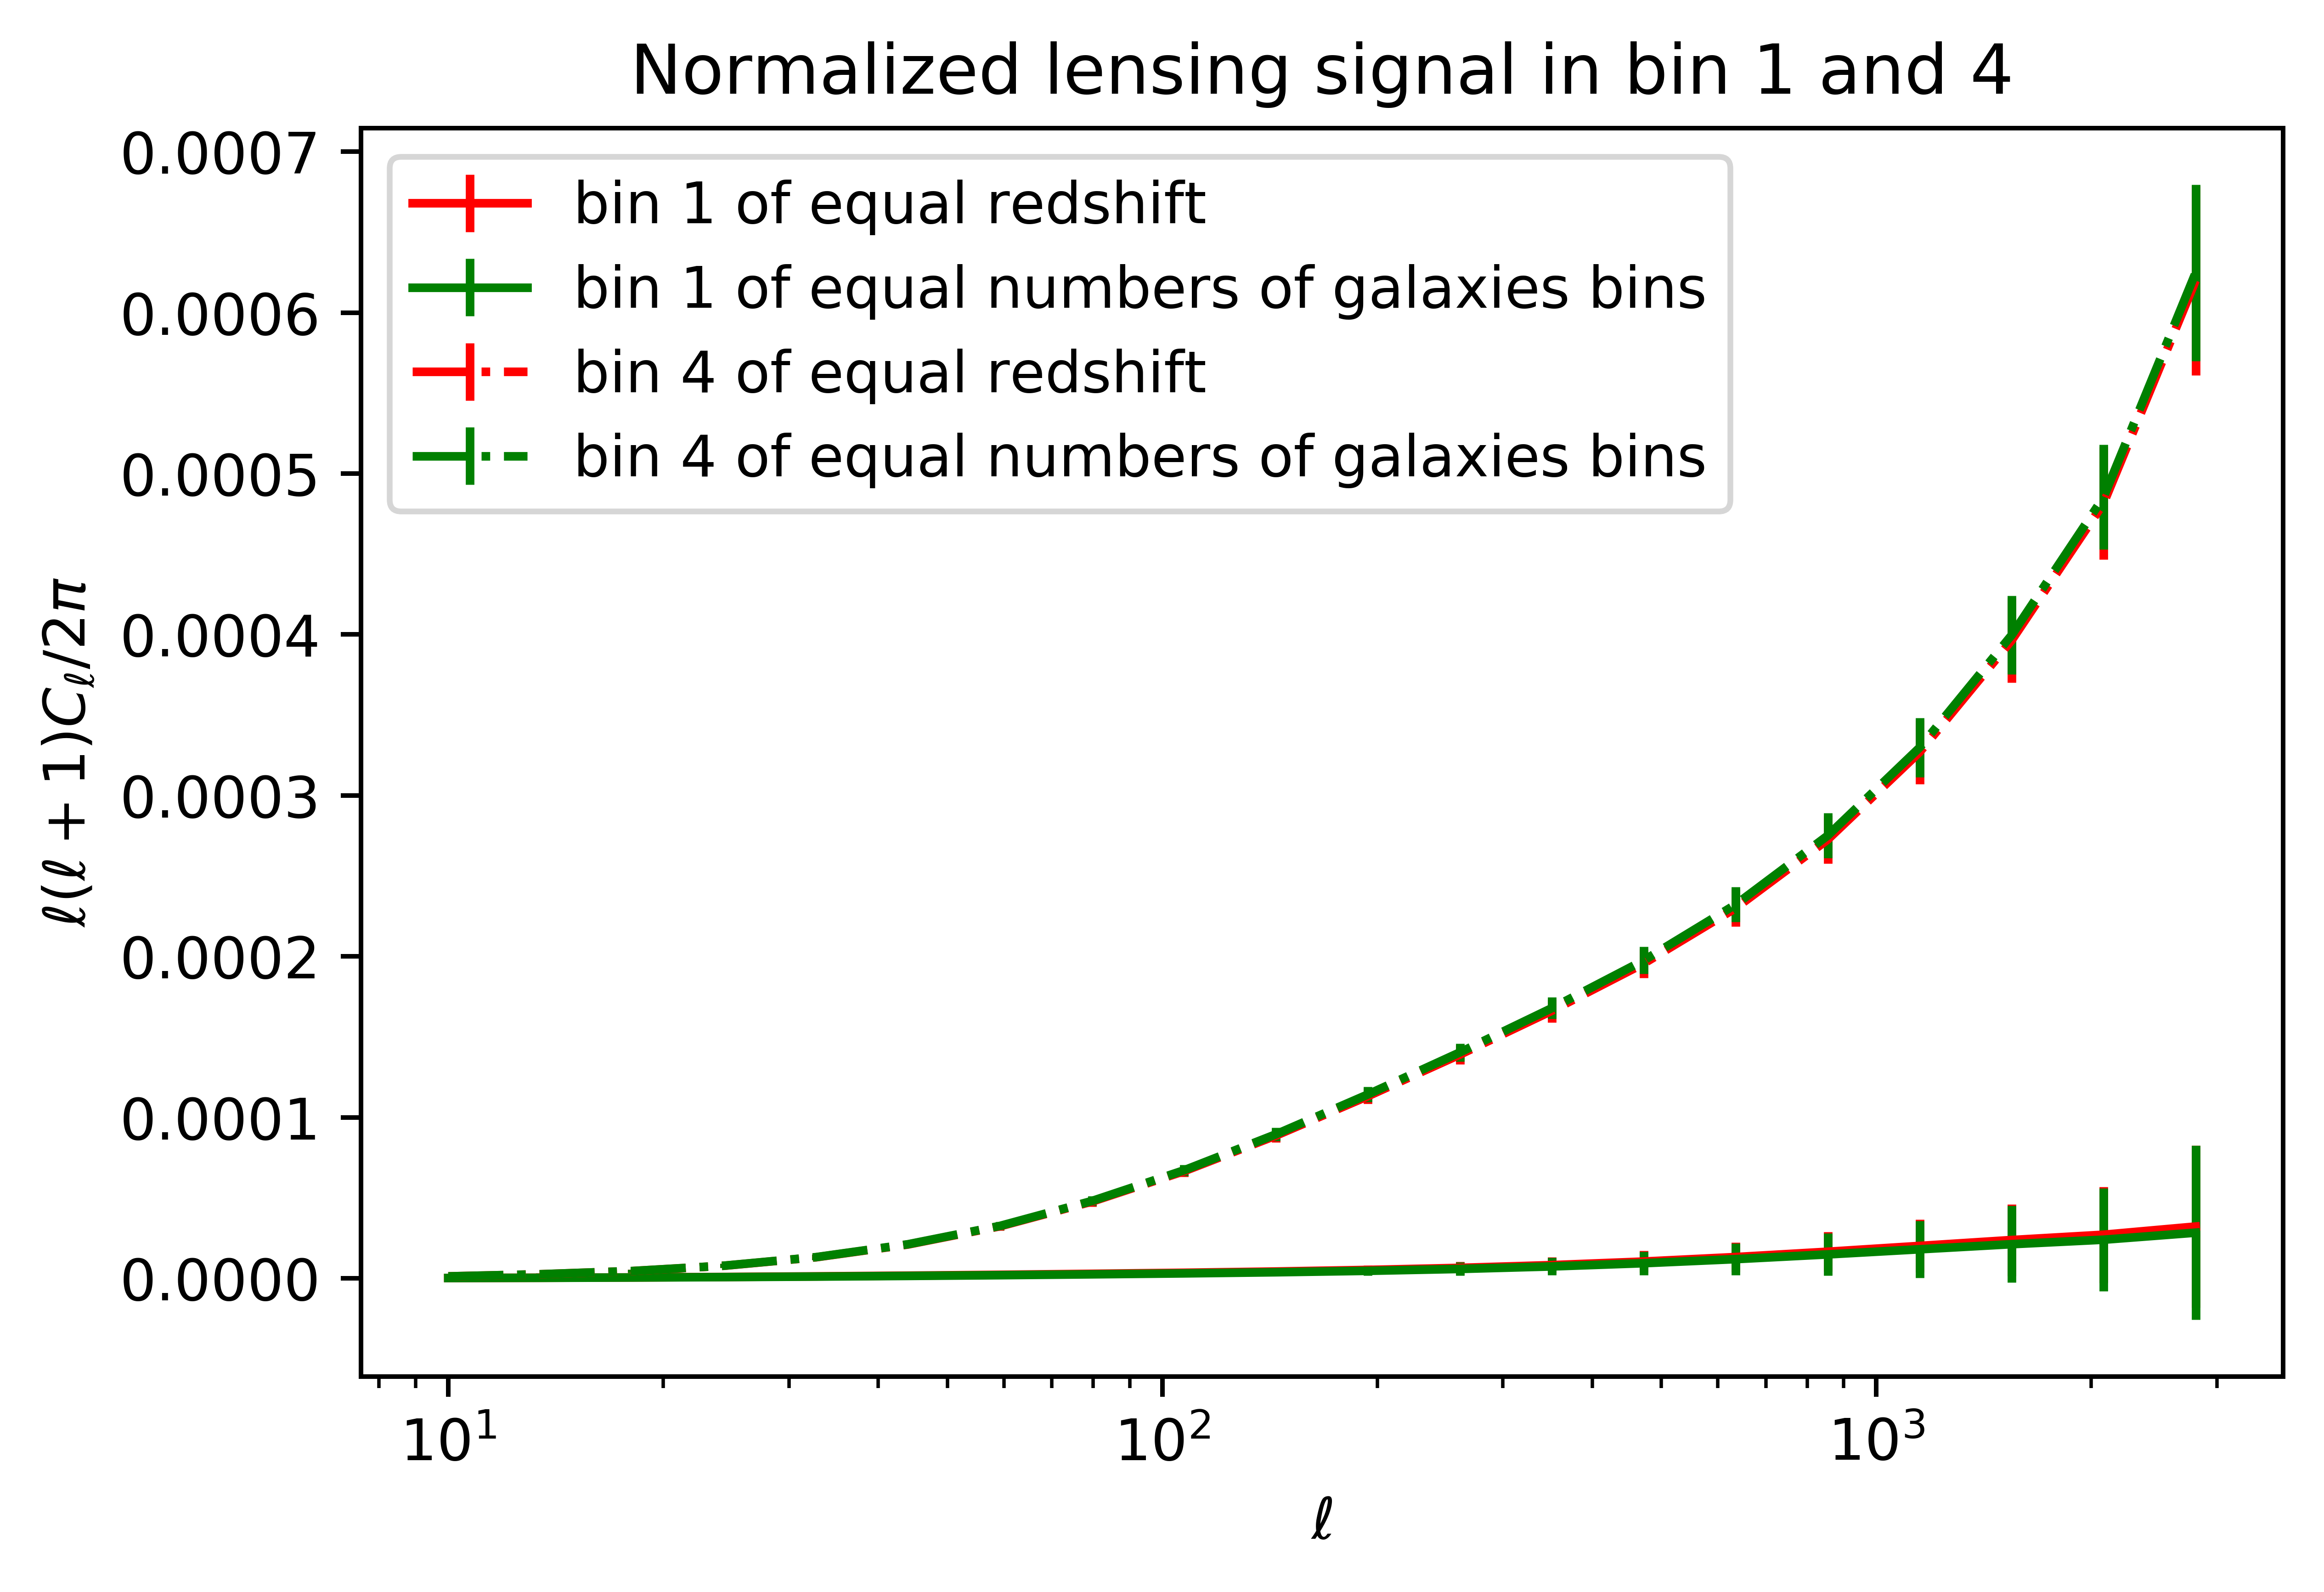

In [81]:
plt.figure()

plt.errorbar(binl, normalizing(binned_cl_s["z_4"][0], binl), yerr = normalizing(np.sqrt(binned_cov_s["z_4"][:, 0, 0]), binl), color='r', label = "bin 1 of equal redshift")
plt.errorbar(binl, normalizing(binned_cl_s["n_4"][0], binl), yerr = normalizing(np.sqrt(binned_cov_s["n_4"][:, 0, 0]), binl), color='g', label = "bin 1 of equal numbers of galaxies bins")

plt.errorbar(binl, normalizing(binned_cl_s["z_4"][9], binl), yerr = normalizing(np.sqrt(binned_cov_s["z_4"][:, 9, 9]), binl), color='r', ls='-.', label = "bin 4 of equal redshift")
plt.errorbar(binl, normalizing(binned_cl_s["n_4"][9], binl), yerr = normalizing(np.sqrt(binned_cov_s["n_4"][:, 9, 9]), binl), color='g', ls='-.', label = "bin 4 of equal numbers of galaxies bins")


plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_{\ell}/2\pi$')
plt.legend(loc="upper left")
plt.title("Normalized lensing signal in bin 1 and 4")
plt.show() 

the error bar looks large for l>2000, at the last l, the error bar on bin 4 of equal galaxy number look about 10^-4, let's print out the values

In [85]:
normalizing(binned_cl_s["z_4"][0],  binl)

array([2.02037732e-17, 1.77509857e-17, 1.16718283e-17, 6.30676769e-18,
       3.89580092e-18, 1.96612123e-18, 1.07613324e-18, 5.37736391e-19,
       2.62994625e-19, 1.32253301e-19, 6.55205724e-20, 3.35539426e-20,
       1.72357010e-20, 8.98436947e-21, 4.67011788e-21, 2.38694559e-21,
       1.19520114e-21, 5.79807522e-22, 2.70664615e-22, 1.65874197e-22])

In [86]:
normalizing(np.sqrt(binned_cov_s["z_4"][:, 0, 0]), binl)

array([1.09594273e-17, 1.22108470e-17, 7.04553066e-18, 3.05089020e-18,
       1.86787481e-18, 8.29458748e-19, 4.72149956e-19, 2.35867170e-19,
       1.21193102e-19, 6.67937396e-20, 3.53980322e-20, 1.96143139e-20,
       1.06341953e-20, 5.86177287e-21, 3.22616685e-21, 1.76918212e-21,
       9.78067358e-22, 5.40248034e-22, 2.97502314e-22, 2.59380180e-22])

In [87]:
normalizing(np.sqrt(binned_cov_s["n_4"][:, 0, 0]), binl)

array([1.12693095e-17, 1.25679274e-17, 7.27135540e-18, 3.16124665e-18,
       1.94483564e-18, 8.68162996e-19, 4.96823261e-19, 2.49359669e-19,
       1.28640491e-19, 7.11120455e-20, 3.77662280e-20, 2.09565465e-20,
       1.13726738e-20, 6.27282779e-21, 3.45390987e-21, 1.89466332e-21,
       1.04767553e-21, 5.78792643e-22, 3.18765767e-22, 2.77939032e-22])

In [88]:
normalizing(binned_cl_s["z_4"][9],  binl)

array([9.51289835e-17, 1.15591528e-16, 8.77877762e-17, 5.58209815e-17,
       4.07061242e-17, 2.42398780e-17, 1.56210149e-17, 9.03020329e-18,
       5.00552751e-18, 2.74281711e-18, 1.41035250e-18, 7.13351798e-19,
       3.47392374e-19, 1.67850009e-19, 8.09678529e-20, 3.92732134e-20,
       1.93609343e-20, 9.64141681e-21, 4.80407410e-21, 3.19108969e-21])

In [89]:
normalizing(np.sqrt(binned_cov_s["z_4"][:, 9, 9]), binl)

array([2.46279635e-17, 3.29106482e-17, 1.97576174e-17, 8.76412580e-18,
       5.37081224e-18, 2.32087000e-18, 1.24727234e-18, 5.72969249e-19,
       2.63850901e-19, 1.28782705e-19, 6.05172142e-20, 3.00962760e-20,
       1.49528705e-20, 7.72358874e-21, 4.06440481e-21, 2.16351348e-21,
       1.17309572e-21, 6.39789057e-22, 3.49319022e-22, 3.02992271e-22])

In [90]:
normalizing(np.sqrt(binned_cov_s["n_4"][:, 9, 9]), binl)

array([2.40802641e-17, 3.22944376e-17, 1.93936787e-17, 8.60101786e-18,
       5.26656333e-18, 2.27224873e-18, 1.21805604e-18, 5.57580765e-19,
       2.55523733e-19, 1.23977915e-19, 5.78718218e-20, 2.85851755e-20,
       1.41148424e-20, 7.25414759e-21, 3.80320558e-21, 2.01924262e-21,
       1.09296554e-21, 5.95395674e-22, 3.24825547e-22, 2.81614061e-22])

at the last l, the error bar on bin 4 of equal galaxy number is on the magnitude of 10^-22, which is not what we are seeing in the plot...

I don't understand this

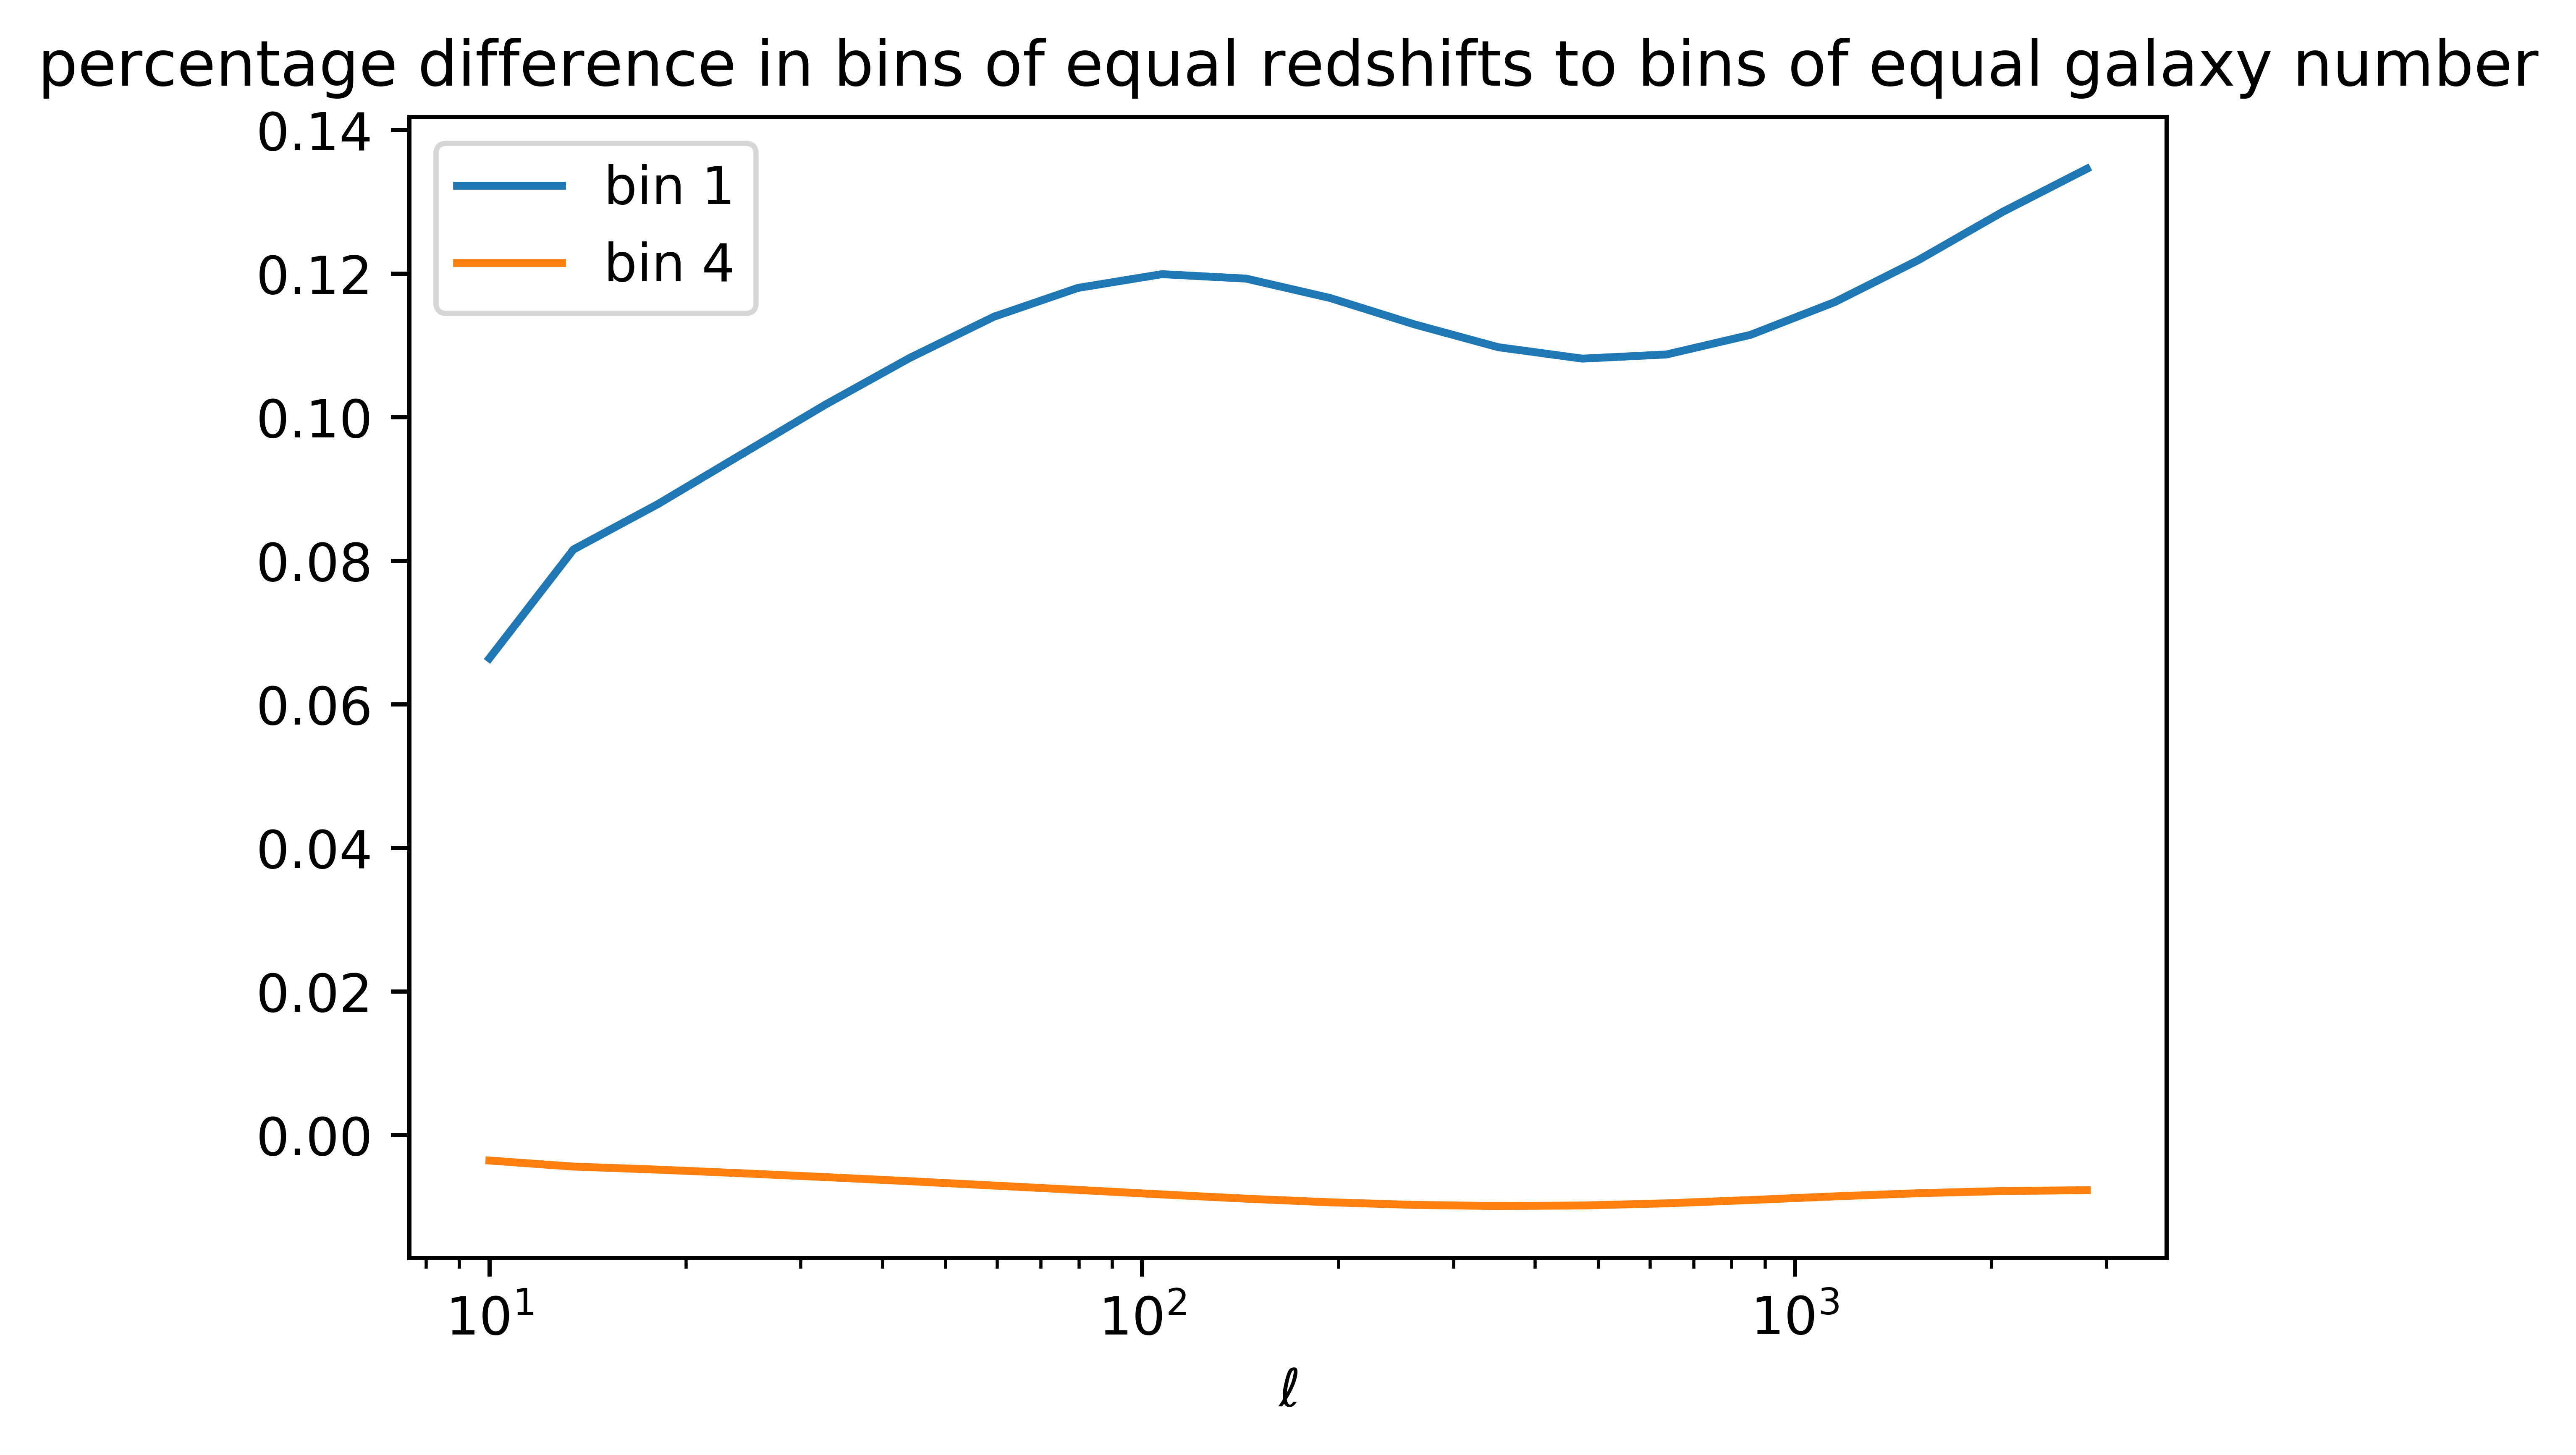

In [78]:
plt.figure()

plt.plot(binl, normalizing(binned_cl_s["z_4"][0], binl)/normalizing(binned_cl_s["n_4"][0], binl)-1, label = "bin 1")
plt.plot(binl, normalizing(binned_cl_s["z_4"][9], binl)/normalizing(binned_cl_s["n_4"][9], binl)-1, label = "bin 4")

plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.legend(loc="upper left")
plt.title("percentage difference in bins of equal redshifts to bins of equal galaxy number")
plt.show() 

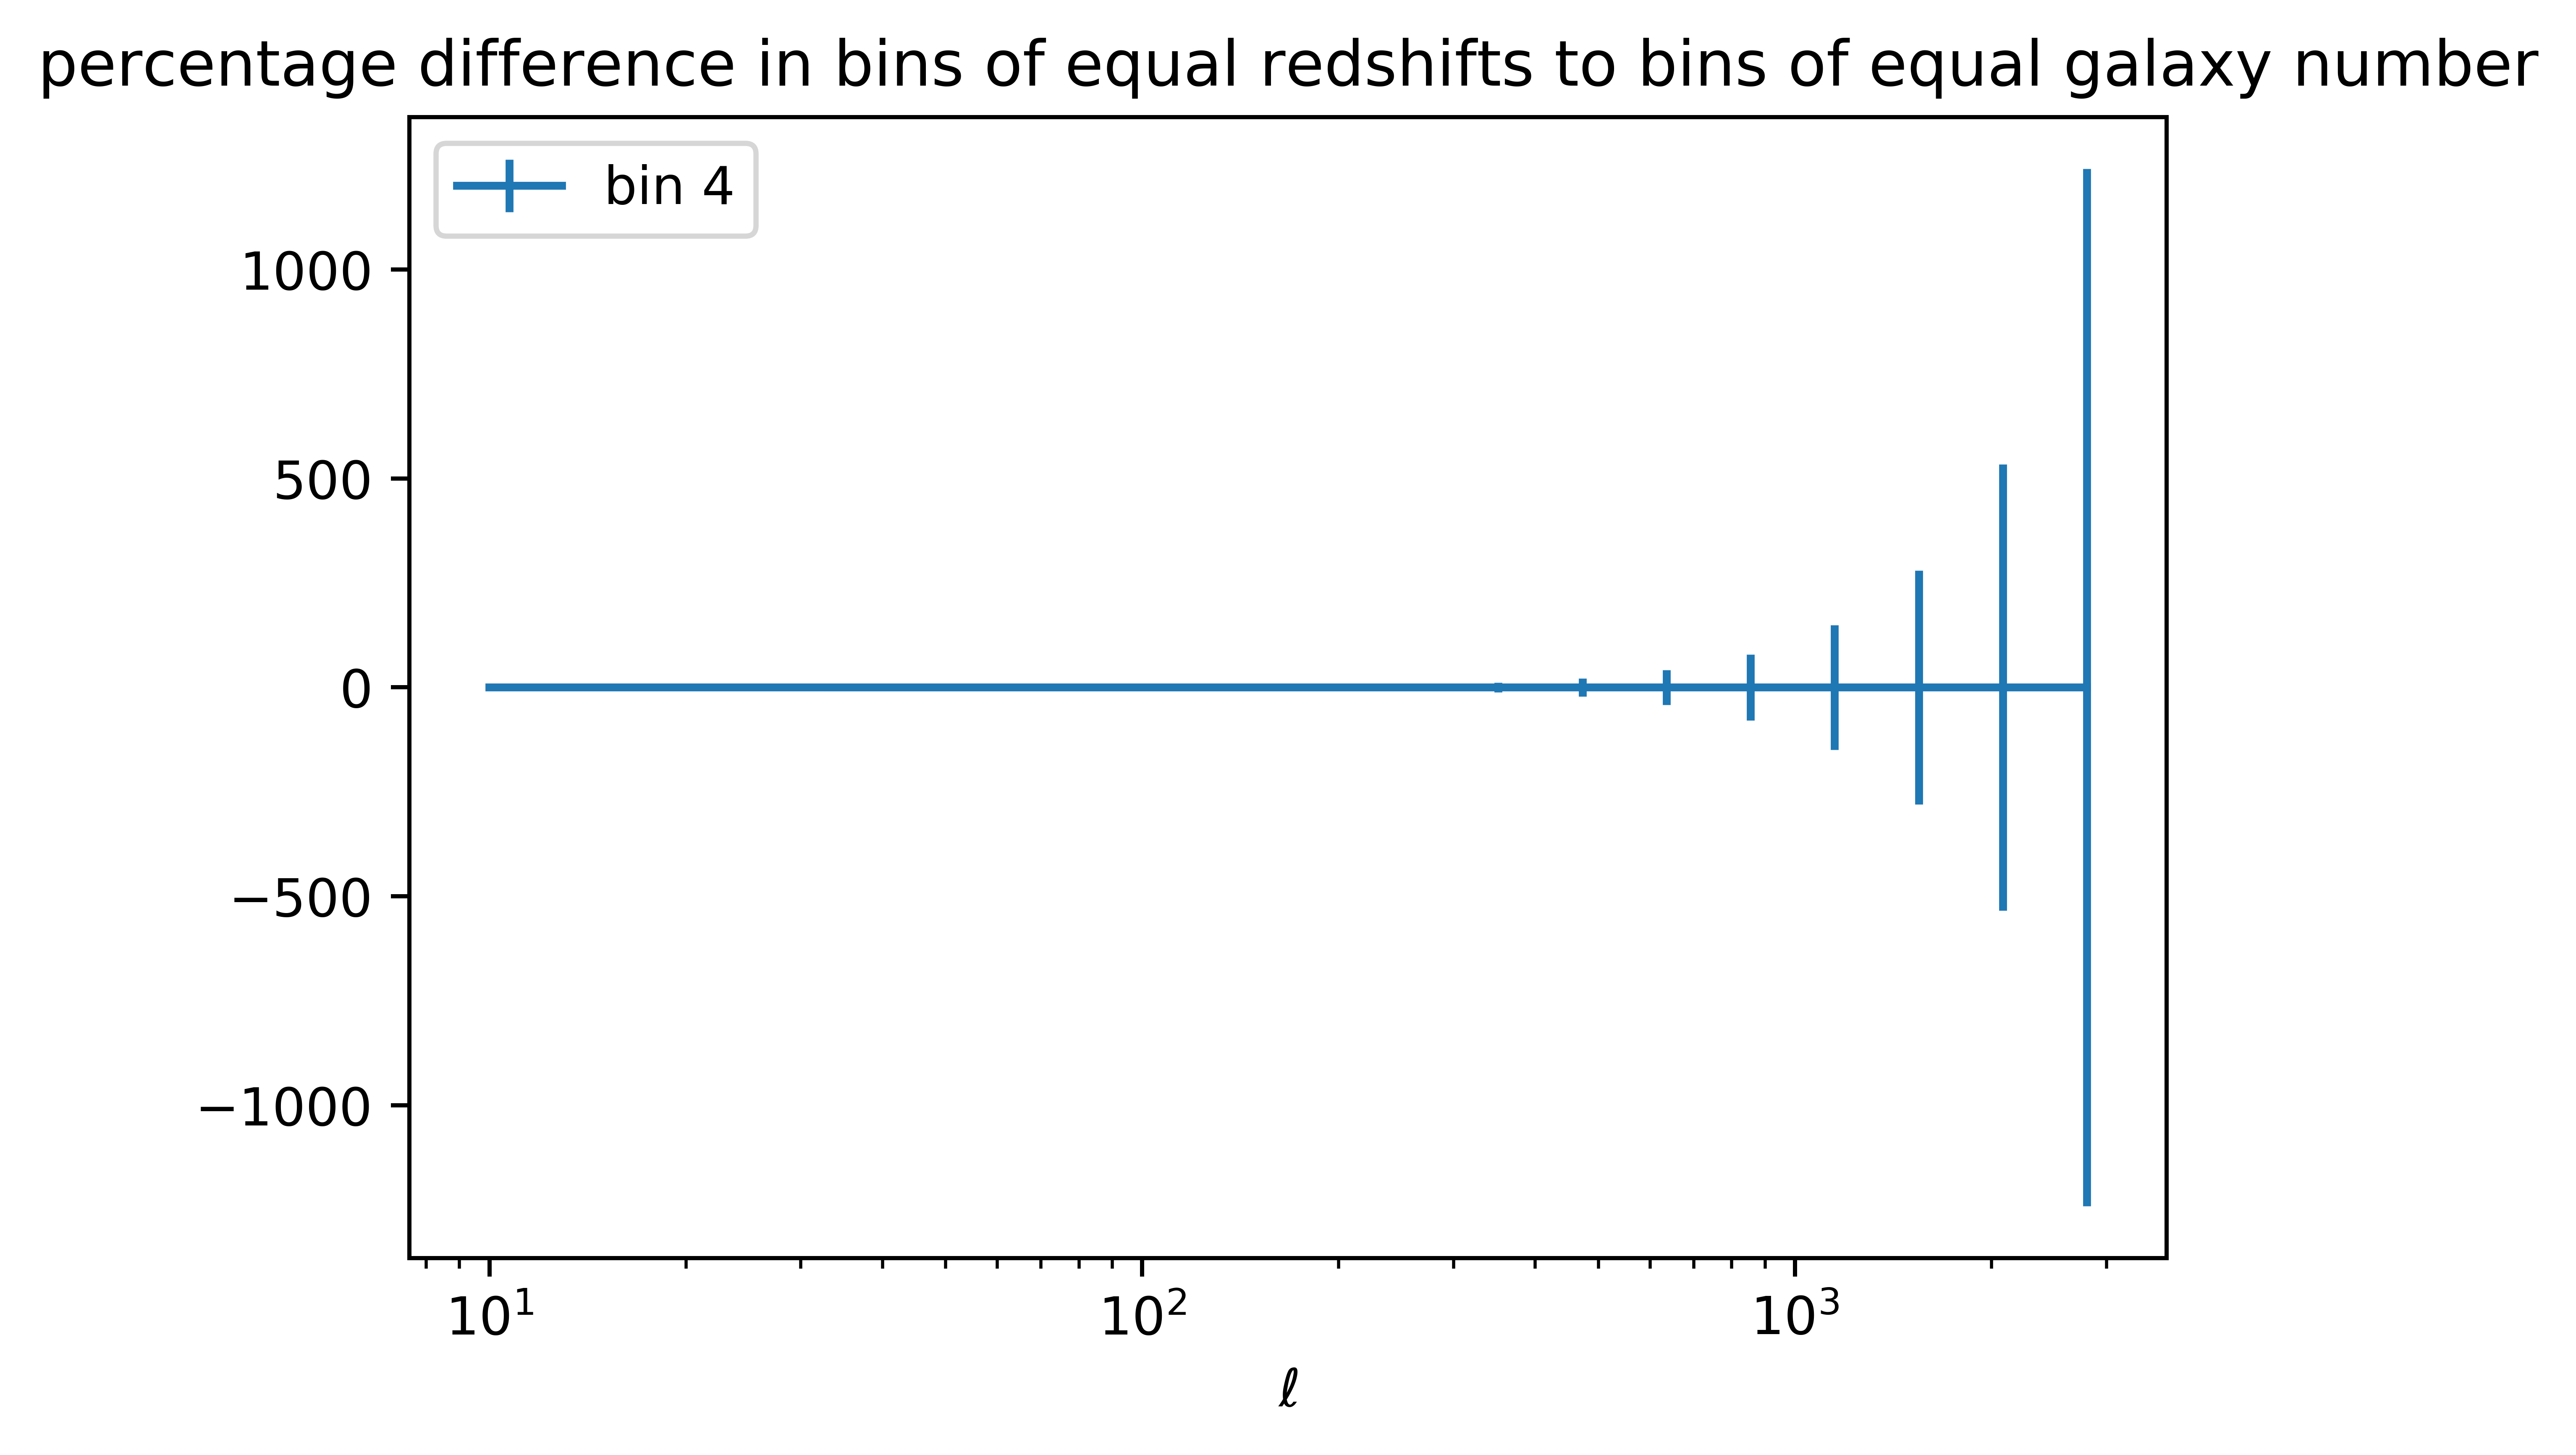

In [79]:
plt.figure()

plt.errorbar(binl, normalizing(binned_cl_s["z_4"][9], binl)/normalizing(binned_cl_s["n_4"][9], binl)-1, 
             yerr = (normalizing(binned_cl_s["z_4"][9], binl)/normalizing(binned_cl_s["n_4"][9], binl)-1)*normalizing(np.sqrt(binned_cov_s["z_4"][:, 9, 9]/binned_cl_s["z_4"][9]**2+binned_cov_s["n_4"][:, 9, 9]/binned_cl_s["n_4"][9]**2), binl), label = "bin 4")

plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.legend(loc="upper left")
plt.title("percentage difference in bins of equal redshifts to bins of equal galaxy number")
plt.show() 

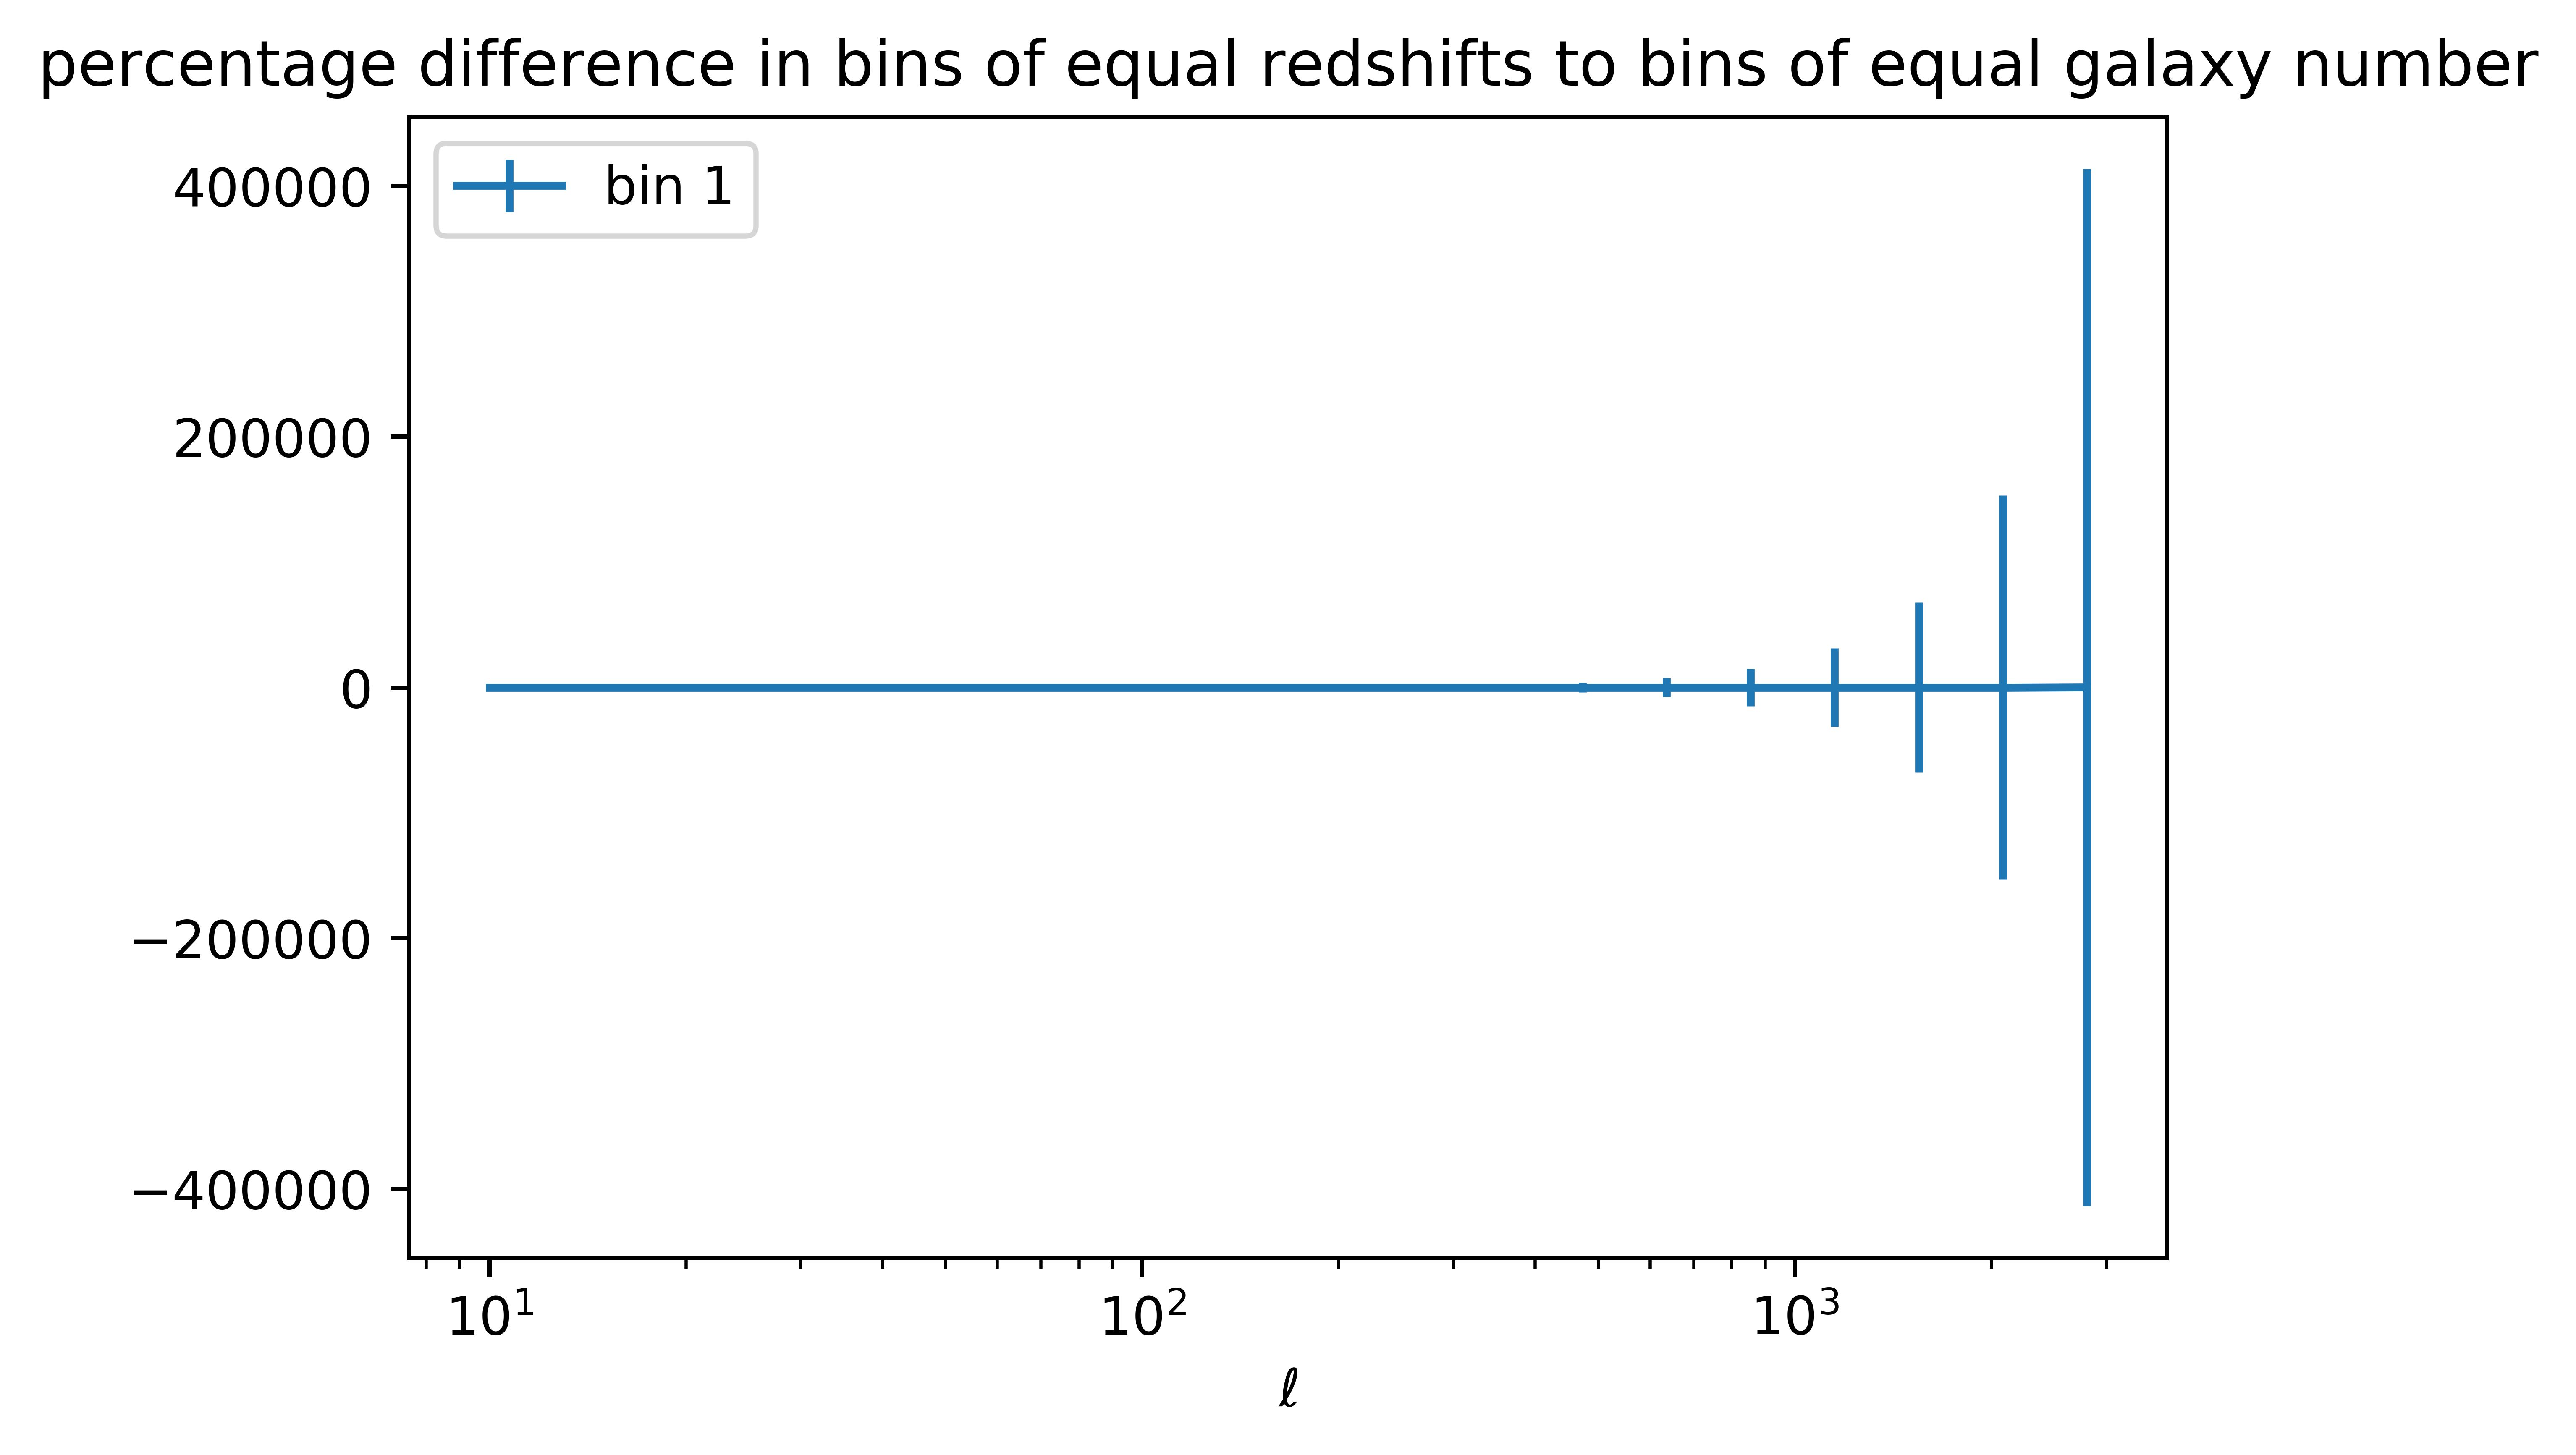

In [80]:
plt.figure()

plt.errorbar(binl, normalizing(binned_cl_s["z_4"][0], binl)/normalizing(binned_cl_s["n_4"][0], binl)-1, 
             yerr = (normalizing(binned_cl_s["z_4"][0], binl)/normalizing(binned_cl_s["n_4"][0], binl)-1)*normalizing(np.sqrt(binned_cov_s["z_4"][:, 0, 0]/binned_cl_s["z_4"][0]**2+binned_cov_s["n_4"][:, 0, 0]/binned_cl_s["n_4"][0]**2), binl), label = "bin 1")

plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.legend(loc="upper left")
plt.title("percentage difference in bins of equal redshifts to bins of equal galaxy number")
plt.show() 

adding error bar just made this plot look pretty huh....